In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [239]:
filepath = "//Fr-vfiler117/V390_DATA_CADV/workgroup/work/321/jmpg/bigdata/Autoland/Vz_study_valid"
#\\Fr-vfiler117\V390_DATA_CADV\workgroup\work\321\jmpg\bigdata\Autoland
liste_file=os.listdir(filepath)
print (liste_file)

['M11000V0217APP000_066-09_43_29-750.CSV', 'M11000V0217APP000_066-09_56_03-750.CSV', 'M11000V0217APP000_066-10_07_09-750.CSV', 'M11000V0217APP000_066-10_18_22-437.CSV', 'M11000V0217APP000_066-10_34_22-187.CSV', 'M11000V0217APP000_066-10_44_06-625.CSV', 'M11000V0217APP000_066-10_53_43-875.CSV', 'M11000V0217APP000_066-11_06_05-312.CSV', 'M11000V0217APP000_066-11_19_56-562.CSV', 'M11000V0217APP000_066-11_28_58-375.CSV', 'M11000V0218APP000_067-12_47_20-187.CSV', 'M11000V0218APP000_067-13_01_25-125.CSV', 'M11000V0218APP000_067-13_08_31-562.CSV', 'M11000V0218APP000_067-13_15_14-750.CSV', 'M11000V0218APP000_067-13_21_50-000.CSV', 'M11000V0218APP000_067-13_28_16-312.CSV', 'M11000V0218APP000_067-13_34_47-437.CSV', 'M11000V0219APP000_067-15_15_24-875.CSV', 'M11000V0219APP000_067-15_22_10-187.CSV', 'M11000V0219APP000_067-15_30_37-812.CSV', 'M11000V0219APP000_067-15_37_24-437.CSV', 'M11000V0219APP000_067-15_43_58-812.CSV', 'M11000V0220APP000_071-14_55_13-062.CSV', 'M11000V0220APP000_071-15_09_18-8

In [240]:
#file_name='M11000V0222APP000_073-10_08_22-312.CSV'
file_name="M11000V0223APPP000_074-09_46_37-062.CSV"
data= pd.read_csv(os.path.join(filepath, file_name),sep=';',skiprows=0,header=(0))

In [241]:
liste = list(data)

for elem in liste:
    typ=type (data[elem][1])
    print (elem,typ)  

GMT_S <class 'numpy.float64'>
GMT <class 'str'>
XP_TP_M <class 'numpy.float64'>
VZP_TP_I <class 'numpy.float64'>
VXP_TP_M <class 'numpy.float64'>
VZ1_TD <class 'numpy.float64'>
VZ2_TD <class 'numpy.float64'>
VZESTFLARE_E1C3 <class 'numpy.float64'>
IMPACT <class 'numpy.float64'>
IMPACT_TD <class 'numpy.float64'>
346116401- <class 'numpy.float64'>
CALC_RWYN <class 'numpy.float64'>
Unnamed: 12 <class 'numpy.float64'>
Unnamed: 13 <class 'numpy.float64'>


In [242]:

def decode_runway(number):
    rwy="unknown"
    if number==38:
        rwy="LFBO32L"
    if number==282:
        rwy="LFOK28"
    if (number>=36.5 and number <=37.5):
        rwy=="LFBO14R"
    if number==13:
        rwy="LFRB25"
    if number==11:
        rwy="LFLC26"
    if number==39:
        rwy="LFBO14L"
    return rwy

In [243]:
data[["runway"]]=data.apply(lambda row: pd.Series(decode_runway(row["CALC_RWYN"])),axis=1)

In [244]:
data.head()

GMT_S                   GMT    XP_TP_M  VZP_TP_I   VXP_TP_M  VZ1_TD  \
0  6.342397e+06  074-09:46:37-062.500 -54.104962       0.0  64.683772     0.0   
1  6.342397e+06  074-09:46:37-125.000 -47.634418       0.0  64.692439     0.0   
2  6.342397e+06  074-09:46:37-187.500 -47.634418       0.0  64.692439     0.0   
3  6.342397e+06  074-09:46:37-250.000 -41.162444       0.0  64.691463     0.0   
4  6.342397e+06  074-09:46:37-312.500 -34.695640       0.0  64.726322     0.0   

   VZ2_TD  VZESTFLARE_E1C3  IMPACT  IMPACT_TD  346116401-  CALC_RWYN  \
0     0.0              0.0     0.0        0.0         0.0        0.0   
1     0.0              0.0     0.0        0.0         0.0        0.0   
2     0.0              0.0     0.0        0.0         0.0        0.0   
3     0.0              0.0     0.0        0.0         0.0        0.0   
4     0.0              0.0     0.0        0.0         0.0        0.0   

   Unnamed: 12  Unnamed: 13   runway  
0          NaN          NaN  unknown  
1          NaN          NaN  unknown  
2          NaN          NaN  unknown  
3          NaN          NaN  unknown  
4          NaN          NaN  unknown

In [245]:
print (data.runway[0])

unknown


In [246]:
filepath_rwy = "C:/Users/to09267/Documents/PYTHON notebook/RWY_PROFILE"
liste_file=os.listdir(filepath_rwy)
print (liste_file)

['Compiled_data_vz.csv', 'Compiled_data_vz.dxp', 'LFBO14L_Profile.csv', 'LFBO14R_Profile.csv', 'LFBO32L_Profile.csv', 'LFLC26_Profile.csv', 'LFLC26_Profile_1m.csv', 'LFOK28_Profile.csv', 'LFRB25_Profile.csv']


In [247]:
LFBO14L= pd.read_csv(os.path.join(filepath_rwy, 'LFBO14L_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()
LFBO14R= pd.read_csv(os.path.join(filepath_rwy, 'LFBO14R_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()
LFBO32L= pd.read_csv(os.path.join(filepath_rwy, 'LFBO32L_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()
LFLC26= pd.read_csv(os.path.join(filepath_rwy, 'LFLC26_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()
LFOK28= pd.read_csv(os.path.join(filepath_rwy, 'LFOK28_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()
LFRB25= pd.read_csv(os.path.join(filepath_rwy, 'LFRB25_Profile.csv'),sep=',',skiprows=0,header=(0)).dropna()

In [248]:
LFRB25.head()

XRWY  ZRWY    ZRWYFT  SLOPE
2 -400.0  0.18  0.590551    0.0
3 -350.0  0.18  0.590551    0.0
4 -300.0  0.18  0.590551    0.0
5 -250.0  0.18  0.590551    0.0
6 -200.0  0.18  0.590551    0.0

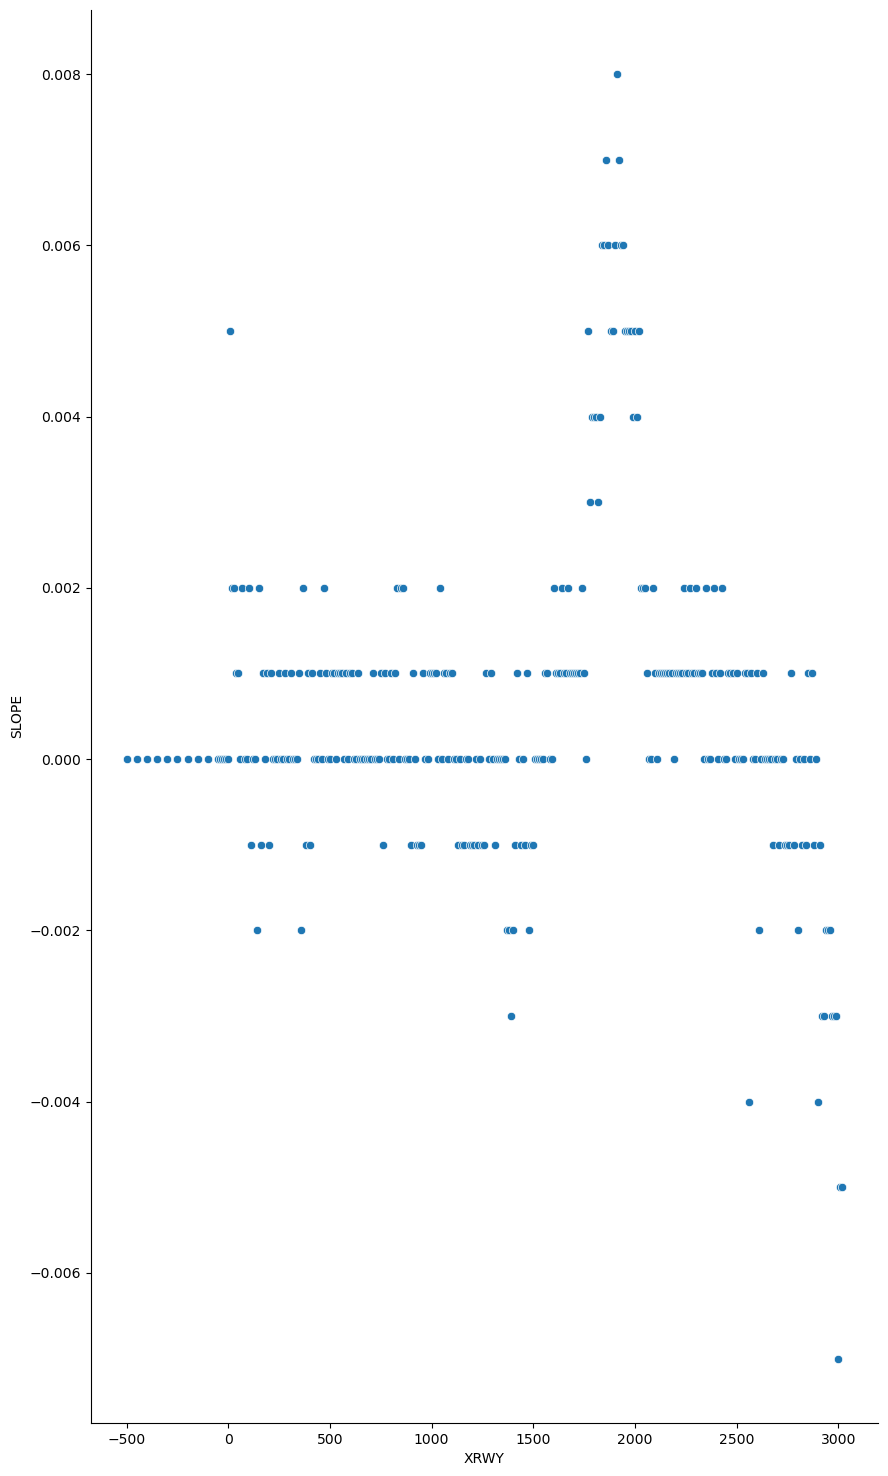

In [249]:
sns.pairplot(x_vars="XRWY", y_vars="SLOPE",data=LFBO14L,height=15, aspect=0.6)
#sns.pairplot(x_vars="XRWY", y_vars="SLOPE",data=LFOK28,height=15, aspect=0.6)
plt.show()    

In [250]:
index_inf=max((LFOK28.index[LFOK28["XRWY"] < -30]).tolist())
print (index)

NameError: name 'index' is not defined

In [251]:
def interpolate_LFOK28(XTP):
    index_inf=max((LFOK28.index[LFOK28["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFOK28.loc[index_inf,"XRWY"]
    X_sup=LFOK28.loc[index_sup,"XRWY"]
    Y_inf=LFOK28.loc[index_inf,"ZRWY"]
    Y_sup=LFOK28.loc[index_sup,"ZRWY"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)
    
    

In [261]:
def interpolate_RUNWAY(XTP,RUNWAY,COLONNE):
    #COLONNE = SLOPE or ZRWY or ZRWYFT
    #RUWNAY
    index_inf=max((RUNWAY.index[RUNWAY["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=RUNWAY.loc[index_inf,"XRWY"]
    X_sup=RUNWAY.loc[index_sup,"XRWY"]
    Y_inf=RUNWAY.loc[index_inf,COLONNE]
    Y_sup=RUNWAY.loc[index_sup,COLONNE]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)
    

In [262]:

data[["ZRWY"]]=data.apply(lambda row: pd.Series(interpolate_LFOK28(row["XP_TP_M"])),axis=1)

In [265]:
data[["ZRWY_gen"]]=data.apply(lambda row: pd.Series(interpolate_RUNWAY(row["XP_TP_M"],"LFOK28","ZRWY")),axis=1)

TypeError: string indices must be integers

In [264]:
print (data.ZRWY_gen,data.ZRWY)

0      0.034284
1      0.028634
2      0.028634
3      0.022162
4      0.015696
         ...   
241   -1.459431
242   -1.459431
243   -1.464010
244   -1.466323
245   -1.466323
Name: ZRWY_gen, Length: 246, dtype: float64 0      0.034284
1      0.028634
2      0.028634
3      0.022162
4      0.015696
         ...   
241   -1.459431
242   -1.459431
243   -1.464010
244   -1.466323
245   -1.466323
Name: ZRWY, Length: 246, dtype: float64


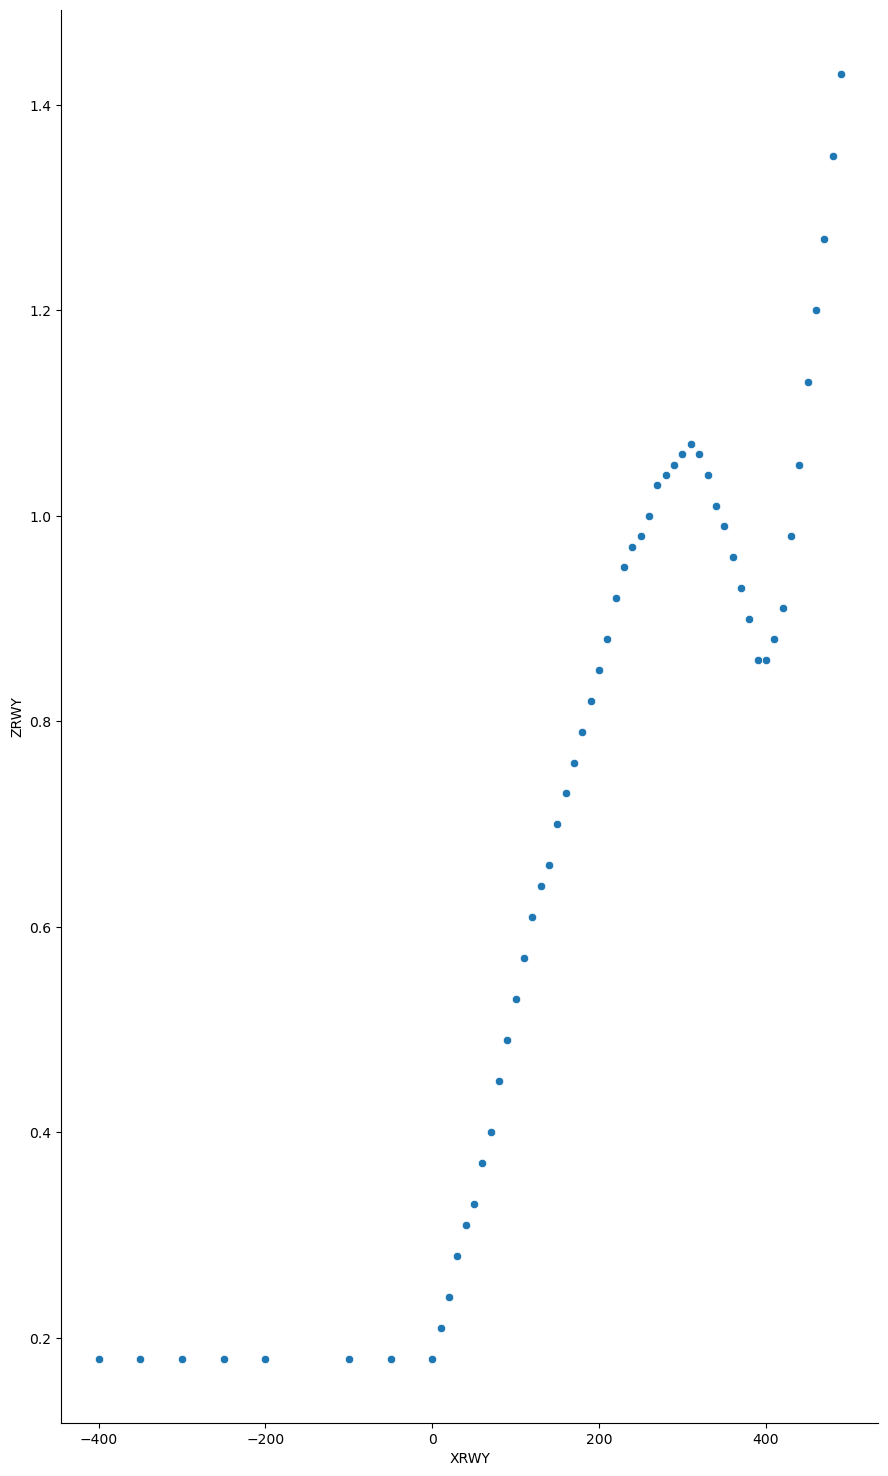

In [38]:

sns.pairplot(x_vars="XRWY", y_vars="ZRWY",data=LFRB25[LFRB25.XRWY<500],height=15, aspect=0.6)
#sns.pairplot(x_vars="XP_TP_M", y_vars="ZRWY",data=data,height=15, aspect=0.6)
plt.show()


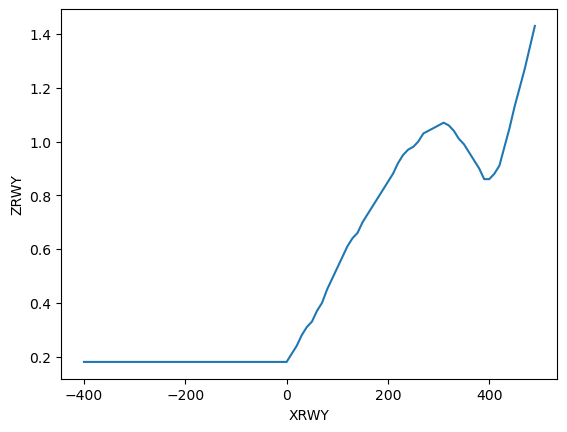

In [40]:

sns.lineplot(x="XRWY", y="ZRWY",data=LFRB25[LFRB25.XRWY<500])
#sns.pairplot(x_vars="XP_TP_M", y_vars="ZRWY",data=data,height=15, aspect=0.6)
plt.show()


In [111]:
index_impact=min((data.index[data["IMPACT_TD"] ==1]).tolist())
print (index_impact)

125


In [115]:
print (data.loc[index_impact,"VZ1_TD"])

-2.195376


In [117]:
data.loc[index_impact,"INDEX_REF"]=100

In [118]:
print (data.loc[index_impact,"INDEX_REF"])

100.0


In [133]:
for i in range(1, 101):
    index=index_impact-i+1
    new_index=100-i+1
    data.loc[index,"INDEX_REF"]=new_index
       

In [137]:
print (data.loc[124,'INDEX_REF'])

99.0


In [138]:
data.head()

GMT_S                   GMT    XP_TP_M   VZP_TP_I   VXP_TP_M  \
0  7.569840e+06  088-14:44:00-437.500 -30.403226 -10.347766  64.032106   
1  7.569840e+06  088-14:44:00-500.000 -23.997770 -10.291420  64.040052   
2  7.569841e+06  088-14:44:00-562.500 -23.997770 -10.291420  64.040052   
3  7.569841e+06  088-14:44:00-625.000 -17.591827 -10.242332  64.047640   
4  7.569841e+06  088-14:44:00-687.500 -17.591827 -10.242332  64.047640   

      VZ1_TD     VZ2_TD  VZESTFLARE_E1C3  IMPACT  IMPACT_TD  346116401-  \
0 -10.331300  -9.949235       -10.463710     0.0        0.0      44.875   
1 -10.313755  -9.811063       -10.408587     0.0        0.0      44.000   
2 -10.373016  -9.847783       -10.377019     0.0        0.0      43.750   
3 -10.211374 -10.059512       -10.305396     0.0        0.0      42.875   
4 -10.147455  -9.982608       -10.240354     0.0        0.0      42.375   

   CALC_RWYN  Unnamed: 12  Unnamed: 13  runway      ZRWY  INDEX_REF  
0      282.0          NaN          NaN  LFOK28  0.011403        NaN  
1      282.0          NaN          NaN  LFOK28  0.004998       26.0  
2      282.0          NaN          NaN  LFOK28  0.004998       27.0  
3      282.0          NaN          NaN  LFOK28  0.000759       28.0  
4      282.0          NaN          NaN  LFOK28  0.000759       29.0

#DEBUT DES BOUCLAGES

In [18]:
def interpolate_LFOK28(XTP):
    index_inf=max((LFOK28.index[LFOK28["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFOK28.loc[index_inf,"XRWY"]
    X_sup=LFOK28.loc[index_sup,"XRWY"]
    Y_inf=LFOK28.loc[index_inf,"SLOPE"]
    Y_sup=LFOK28.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [39]:
def interpolate_ZRWY_LFOK28(XTP):
    index_inf=max((LFOK28.index[LFOK28["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFOK28.loc[index_inf,"XRWY"]
    X_sup=LFOK28.loc[index_sup,"XRWY"]
    Y_inf=LFOK28.loc[index_inf,"ZRWYFT"]
    Y_sup=LFOK28.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [40]:
def interpolate_LFBO14L(XTP):
    index_inf=max((LFBO14L.index[LFBO14L["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO14L.loc[index_inf,"XRWY"]
    X_sup=LFBO14L.loc[index_sup,"XRWY"]
    Y_inf=LFBO14L.loc[index_inf,"SLOPE"]
    Y_sup=LFBO14L.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [41]:
def interpolate_ZRWY_LFBO14L(XTP):
    index_inf=max((LFBO14L.index[LFBO14L["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO14L.loc[index_inf,"XRWY"]
    X_sup=LFBO14L.loc[index_sup,"XRWY"]
    Y_inf=LFBO14L.loc[index_inf,"ZRWYFT"]
    Y_sup=LFBO14L.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [42]:
def interpolate_LFBO14R(XTP):
    index_inf=max((LFBO14R.index[LFBO14R["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO14R.loc[index_inf,"XRWY"]
    X_sup=LFBO14R.loc[index_sup,"XRWY"]
    Y_inf=LFBO14R.loc[index_inf,"SLOPE"]
    Y_sup=LFBO14R.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [43]:
def interpolate_ZRWY_LFBO14R(XTP):
    index_inf=max((LFBO14R.index[LFBO14R["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO14R.loc[index_inf,"XRWY"]
    X_sup=LFBO14R.loc[index_sup,"XRWY"]
    Y_inf=LFBO14R.loc[index_inf,"ZRWYFT"]
    Y_sup=LFBO14R.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [44]:
def interpolate_ZRWY_LFBO32L(XTP):
    index_inf=max((LFBO32L.index[LFBO32L["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO32L.loc[index_inf,"XRWY"]
    X_sup=LFBO32L.loc[index_sup,"XRWY"]
    Y_inf=LFBO32L.loc[index_inf,"ZRWYFT"]
    Y_sup=LFBO32L.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [45]:
def interpolate_LFBO32L(XTP):
    index_inf=max((LFBO32L.index[LFBO32L["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFBO32L.loc[index_inf,"XRWY"]
    X_sup=LFBO32L.loc[index_sup,"XRWY"]
    Y_inf=LFBO32L.loc[index_inf,"SLOPE"]
    Y_sup=LFBO32L.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [46]:
def interpolate_LFLC26(XTP):
    index_inf=max((LFLC26.index[LFLC26["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFLC26.loc[index_inf,"XRWY"]
    X_sup=LFLC26.loc[index_sup,"XRWY"]
    Y_inf=LFLC26.loc[index_inf,"SLOPE"]
    Y_sup=LFLC26.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [47]:
def interpolate_ZRWY_LFLC26(XTP):
    index_inf=max((LFLC26.index[LFLC26["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFLC26.loc[index_inf,"XRWY"]
    X_sup=LFLC26.loc[index_sup,"XRWY"]
    Y_inf=LFLC26.loc[index_inf,"ZRWYFT"]
    Y_sup=LFLC26.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [48]:
def interpolate_LFRB25(XTP):
    index_inf=max((LFRB25.index[LFRB25["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFRB25.loc[index_inf,"XRWY"]
    X_sup=LFRB25.loc[index_sup,"XRWY"]
    Y_inf=LFRB25.loc[index_inf,"SLOPE"]
    Y_sup=LFRB25.loc[index_sup,"SLOPE"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [49]:
def interpolate_ZRWY_LFRB25(XTP):
    index_inf=max((LFRB25.index[LFRB25["XRWY"] < XTP]).tolist())
    index_sup=index_inf+1
    X_inf=LFRB25.loc[index_inf,"XRWY"]
    X_sup=LFRB25.loc[index_sup,"XRWY"]
    Y_inf=LFRB25.loc[index_inf,"ZRWYFT"]
    Y_sup=LFRB25.loc[index_sup,"ZRWYFT"]
    Y_inter=(Y_sup-Y_inf)/(X_sup-X_inf)*(XTP-X_inf)+Y_inf
    return (Y_inter)

In [162]:
filepath = "//Fr-vfiler117/V390_DATA_CADV/workgroup/work/321/jmpg/bigdata/Autoland"
#\\Fr-vfiler117\V390_DATA_CADV\workgroup\work\321\jmpg\bigdata\Autoland
liste_file=os.listdir(filepath)
print (liste_file)

['FLARE_223.csv', 'FLARE_223.csv~', 'FLARE_CERTIF.csv', 'Flare_XLR_certif.csv', 'Florian_Internship', 'go_predi_autoland_for_DEA.pl', 'go_predi_autoland_Vzimpact.pl', 'go_predi_autoland_Vzimpact.pl~', 'go_predi_autoland_Vzimpact.pl~~', 'Liste_GMT_319_AL_Dev.csv', 'Liste_GMT_319_AL_PATS.csv', 'Liste_GMT_320_321_AL_Dev.csv', 'Liste_GMT_320_AL_PATS.csv', 'Liste_GMT_321_AL_PATS.csv', 'Liste_GMT_SA_AL_Dev.csv', 'Liste_GMT_SA_AL_PATS.csv', 'M11000V0217APP000_066-09_43_29-750.CSV', 'M11000V0217APP000_066-09_56_03-750.CSV', 'M11000V0217APP000_066-10_07_09-750.CSV', 'M11000V0217APP000_066-10_18_22-437.CSV', 'M11000V0217APP000_066-10_34_22-187.CSV', 'M11000V0217APP000_066-10_44_06-625.CSV', 'M11000V0217APP000_066-10_53_43-875.CSV', 'M11000V0217APP000_066-11_06_05-312.CSV', 'M11000V0217APP000_066-11_19_56-562.CSV', 'M11000V0217APP000_066-11_28_58-375.CSV', 'M11000V0218APP000_067-12_47_20-187.CSV', 'M11000V0218APP000_067-13_01_25-125.CSV', 'M11000V0218APP000_067-13_08_31-562.CSV', 'M11000V0218APP0

In [163]:
liste_file_old=['M11000V0217APP000_066-09_43_29-750.CSV', 'M11000V0217APP000_066-09_56_03-750.CSV', 'M11000V0217APP000_066-10_07_09-750.CSV', 'M11000V0217APP000_066-10_18_22-437.CSV', 'M11000V0217APP000_066-10_34_22-187.CSV', 'M11000V0217APP000_066-10_44_06-625.CSV', 'M11000V0217APP000_066-10_53_43-875.CSV', 'M11000V0217APP000_066-11_06_05-312.CSV', 'M11000V0217APP000_066-11_19_56-562.CSV', 'M11000V0217APP000_066-11_28_58-375.CSV', 'M11000V0218APP000_067-12_47_20-187.CSV', 'M11000V0218APP000_067-13_01_25-125.CSV', 'M11000V0218APP000_067-13_08_31-562.CSV', 'M11000V0218APP000_067-13_15_14-750.CSV', 'M11000V0218APP000_067-13_21_50-000.CSV', 'M11000V0218APP000_067-13_28_16-312.CSV', 'M11000V0218APP000_067-13_34_47-437.CSV', 'M11000V0219APP000_067-15_15_24-875.CSV', 'M11000V0219APP000_067-15_22_10-187.CSV', 'M11000V0219APP000_067-15_30_37-812.CSV', 'M11000V0219APP000_067-15_37_24-437.CSV', 'M11000V0219APP000_067-15_43_58-812.CSV', 'M11000V0220APP000_071-14_55_13-062.CSV', 'M11000V0220APP000_071-15_09_18-875.CSV', 'M11000V0220APP000_071-15_19_36-812.CSV', 'M11000V0220APP000_071-15_29_41-437.CSV', 'M11000V0220APP000_071-15_39_41-750.CSV', 'M11000V0220APP000_071-15_59_27-375.CSV', 'M11000V0220APP000_071-16_12_42-125.CSV', 'M11000V0220APP000_071-16_25_16-687.CSV', 'M11000V0220APP000_071-16_36_57-375.CSV', 'M11000V0220APP000_071-16_48_21-562.CSV', 'M11000V0222APP000_073-09_09_07-687.CSV', 'M11000V0222APP000_073-09_21_54-625.CSV', 'M11000V0222APP000_073-09_32_09-187.CSV', 'M11000V0222APP000_073-09_41_27-687.CSV', 'M11000V0222APP000_073-09_53_52-000.CSV', 'M11000V0222APP000_073-10_08_22-312.CSV', 'M11000V0222APP000_073-10_18_23-687.CSV', 'M11000V0222APP000_073-10_26_07-562.CSV', 'M11000V0222APP000_073-10_34_29-937.CSV', 'M11000V0222APP000_073-10_43_07-562.CSV', 'M11000V0223APPP000_074-08_44_26-750.CSV', 'M11000V0223APPP000_074-09_05_31-750.CSV', 'M11000V0223APPP000_074-09_19_07-562.CSV', 'M11000V0223APPP000_074-09_28_43-187.CSV', 'M11000V0223APPP000_074-09_46_37-062.CSV', 'M11000V0223APPP000_074-09_56_36-625.CSV', 'M11000V0224APP000_074-11_23_57-125.CSV', 'M11000V0224APP000_074-11_45_37-125.CSV', 'M11000V0224APP000_074-12_01_14-000.CSV', 'M11000V0224APP000_074-12_16_57-750.CSV', 'M11000V0224APP000_074-12_29_16-437.CSV', 'M11000V0224APP000_074-12_39_55-250.CSV', 'M11000V0225APP000_075-09_56_40-062.CSV', 'M11000V0225APP000_075-10_10_24-312.CSV', 'M11000V0225APP000_075-10_23_43-812.CSV', 'M11000V0225APP000_075-10_39_52-750.CSV', 'M11000V0225APP000_075-10_57_16-062.CSV', 'M11000V0225APP000_075-11_09_51-687.CSV', 'M11000V0226APP000_075-13_38_43-812.CSV', 'M11000V0226APP000_075-13_50_05-312.CSV', 'M11000V0226APP000_075-14_00_42-312.CSV', 'M11000V0226APP000_075-14_13_32-000.CSV', 'M11000V0226APP000_075-14_32_50-812.CSV', 'M11000V0226APP000_075-14_44_17-687.CSV', 'M11000V0226APP000_075-15_52_07-875.CSV', 'M11000V0227APP000_079-08_32_37-625.CSV', 'M11000V0227APP000_079-08_45_38-437.CSV', 'M11000V0227APP000_079-08_52_24-000.CSV', 'M11000V0227APP000_079-08_59_59-562.CSV', 'M11000V0227APP000_079-09_06_26-000.CSV', 'M11000V0227APP000_079-09_16_07-250.CSV', 'M11000V0227APP000_079-09_26_25-187.CSV', 'M11000V0227APP000_079-09_35_02-125.CSV', 'M11000V0227APP000_079-09_42_29-937.CSV', 'M11000V0227APP000_079-10_28_23-812.CSV', 'M11000V0228APP000_080-13_17_09-937.CSV', 'M11000V0228APP000_080-13_26_05-812.CSV', 'M11000V0228APP000_080-13_34_26-187.CSV', 'M11000V0228APP000_080-13_42_33-250.CSV', 'M11000V0228APP000_080-14_06_31-312.CSV', 'M11000V0228APP000_080-14_15_12-000.CSV', 'M11000V0228APP000_080-14_26_41-062.CSV', 'M11000V0228APP000_080-14_35_27-750.CSV', 'M11000V0228APP000_080-14_43_36-062.CSV', 'M11000V0228APP000_080-14_52_13-250.CSV', 'M11000V0229APP000_082-08_45_12-750.CSV', 'M11000V0229APP000_082-09_13_37-500.CSV', 'M11000V0229APP000_082-09_21_35-437.CSV', 'M11000V0229APP000_082-09_32_27-750.CSV', 'M11000V0229APP000_082-09_43_23-500.CSV', 'M11000V0233APP000_088-12_56_17-937.CSV', 'M11000V0233APP000_088-13_12_59-625.CSV', 'M11000V0233APP000_088-13_21_47-375.CSV', 'M11000V0233APP000_088-13_36_26-000.CSV', 'M11000V0233APP000_088-13_45_02-375.CSV', 'M11000V0233APP000_088-13_54_00-750.CSV', 'M11000V0233APP000_088-14_09_06-687.CSV', 'M11000V0233APP000_088-14_17_39-375.CSV', 'M11000V0233APP000_088-14_26_32-500.CSV', 'M11000V0233APP000_088-14_35_17-375.CSV', 'M11000V0233APP000_088-14_44_00-437.CSV', 'M11000V0233APP000_088-14_52_12-062.CSV']

In [164]:
print (liste_file_old)

['M11000V0217APP000_066-09_43_29-750.CSV', 'M11000V0217APP000_066-09_56_03-750.CSV', 'M11000V0217APP000_066-10_07_09-750.CSV', 'M11000V0217APP000_066-10_18_22-437.CSV', 'M11000V0217APP000_066-10_34_22-187.CSV', 'M11000V0217APP000_066-10_44_06-625.CSV', 'M11000V0217APP000_066-10_53_43-875.CSV', 'M11000V0217APP000_066-11_06_05-312.CSV', 'M11000V0217APP000_066-11_19_56-562.CSV', 'M11000V0217APP000_066-11_28_58-375.CSV', 'M11000V0218APP000_067-12_47_20-187.CSV', 'M11000V0218APP000_067-13_01_25-125.CSV', 'M11000V0218APP000_067-13_08_31-562.CSV', 'M11000V0218APP000_067-13_15_14-750.CSV', 'M11000V0218APP000_067-13_21_50-000.CSV', 'M11000V0218APP000_067-13_28_16-312.CSV', 'M11000V0218APP000_067-13_34_47-437.CSV', 'M11000V0219APP000_067-15_15_24-875.CSV', 'M11000V0219APP000_067-15_22_10-187.CSV', 'M11000V0219APP000_067-15_30_37-812.CSV', 'M11000V0219APP000_067-15_37_24-437.CSV', 'M11000V0219APP000_067-15_43_58-812.CSV', 'M11000V0220APP000_071-14_55_13-062.CSV', 'M11000V0220APP000_071-15_09_18-8

In [165]:
liste_file=liste_file_old

In [166]:
name='M11000V0233APPP000_088-14_52_12-062.CSV'
i=len(name)-6
print (name[0:11]+"_"+name[i-10:i-2])

M11000V0233_14_52_12


In [167]:
print ('start of list')
binit=0

for file_name in liste_file:
    df = pd.read_csv(os.path.join(filepath, file_name),sep=';',header=(0))
    i=len(file_name)-6
    titre=file_name[0:11]+"_"+file_name[i-10:i-2]
    print (titre)

    #titre pour le dataframe
    df.loc[:, 'file_name'] = titre
    
    #decodage piste
    df[["runway"]]=df.apply(lambda row: pd.Series(decode_runway(row["CALC_RWYN"])),axis=1)
    
    #interpolation du SLOPE fonction de la piste
    print(df.loc[0,'runway'])
    if df.loc[0,'runway']=="LFBO14R":
        df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFBO14R(row["XP_TP_M"])),axis=1)
        df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFBO14R(row["XP_TP_M"])),axis=1)
    if df.loc[0,'runway']=="LFBO14L":
         df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFBO14L(row["XP_TP_M"])),axis=1) 
         df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFBO14L(row["XP_TP_M"])),axis=1)
    if df.loc[0,'runway']=="LFBO32L":
         df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFBO32L(row["XP_TP_M"])),axis=1)
         df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFBO32L(row["XP_TP_M"])),axis=1)
    if df.loc[0,'runway']=="LFOK28":
         df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFOK28(row["XP_TP_M"])),axis=1)
         df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFOK28(row["XP_TP_M"])),axis=1)  
    if df.loc[0,'runway']=="LFLC26":
         df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFLC26(row["XP_TP_M"])),axis=1)
         df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFLC26(row["XP_TP_M"])),axis=1)  
    if df.loc[0,'runway']=="LFRB25":
         df[["slope"]]=df.apply(lambda row: pd.Series(interpolate_LFRB25(row["XP_TP_M"])),axis=1) 
         df[["ZRWYFT"]]=df.apply(lambda row: pd.Series(interpolate_ZRWY_LFRB25(row["XP_TP_M"])),axis=1) 
    
    if df.loc[0,'runway']!='unknown':
        
            
        #calcul des majorations en VZ
        df["DPP_DT"]=df["slope"]*df["VXP_TP_M"]/0.3048
        df["HMLG_TRAJ"]=df["ZP_TP_M"]/0.3048-df["ZRWYFT"]
    
        #calcul des delta_VZ
        df["VZ1_VZESTFLAR"]=df["VZ1_TD"]-df["VZESTFLARE_E1C3"]
        df["VZ2_VZESTFLAR"]=df["VZ2_TD"]-df["VZESTFLARE_E1C3"]
        df["VZTRAJ_COR"]=df["VZP_TP_I"]-df["DPP_DT"]
        df["VZ1_VZTRAJCOR"]=df["VZ1_TD"]-df["VZTRAJ_COR"]
        df["VZ2_VZTRAJCOR"]=df["VZ2_TD"]-df["VZTRAJ_COR"]
        df["VZ1_VZTRAJ"]=df["VZ1_TD"]-df["VZP_TP_I"]
        df["VZ2_VZTRAJ"]=df["VZ2_TD"]-df["VZP_TP_I"]
        df["HRA1COR_HMLG"]=df["HRA1COR_TD"]-df["HMLG_TRAJ"]
        df["HRA2COR_HMLG"]=df["HRA2COR_TD"]-df["HMLG_TRAJ"]
        df["HRA1_TP_M_HMLG"]=df["HRA1_TP_M"]/0.3048-df["HMLG_TRAJ"]
        df["HRA2_TP_M_HMLG"]=df["HRA2_TP_M"]/0.3048-df["HMLG_TRAJ"]
 
    
        #alignement des datasets sur 100 pour le landing
        index_impact=min((df.index[df["IMPACT_TD"] ==1]).tolist())
        df.loc[index_impact,"INDEX_REF"]=100
        for i in range(1, len(df)):
            new_index=i-index_impact+100
            df.loc[i,"INDEX_REF"]=new_index
    

        #dataset=df.loc[df['INDEX_REF']<=100]
        dataset=df

            
        if binit==0:
            df1= dataset
            binit=1
            print ('\t -> init done')
        else:
            df1=pd.concat([df1,dataset],axis=0)
            print ("\t -> appending data")

start of list
M11000V0217_09_43_29
LFBO32L
	 -> init done
M11000V0217_09_56_03
LFBO32L
	 -> appending data
M11000V0217_10_07_09
LFBO32L
	 -> appending data
M11000V0217_10_18_22
LFBO32L
	 -> appending data
M11000V0217_10_34_22
LFBO32L
	 -> appending data
M11000V0217_10_44_06
LFBO32L
	 -> appending data
M11000V0217_10_53_43
LFBO32L
	 -> appending data
M11000V0217_11_06_05
LFBO32L
	 -> appending data
M11000V0217_11_19_56
LFBO32L
	 -> appending data
M11000V0217_11_28_58
LFBO32L
	 -> appending data
M11000V0218_12_47_20
LFOK28
	 -> appending data
M11000V0218_13_01_25
LFOK28
	 -> appending data
M11000V0218_13_08_31
LFOK28
	 -> appending data
M11000V0218_13_15_14
LFOK28
	 -> appending data
M11000V0218_13_21_50
LFOK28
	 -> appending data
M11000V0218_13_28_16
LFOK28
	 -> appending data
M11000V0218_13_34_47
LFOK28
	 -> appending data
M11000V0219_15_15_24
LFOK28
	 -> appending data
M11000V0219_15_22_10
LFOK28
	 -> appending data
M11000V0219_15_30_37
LFOK28
	 -> appending data
M11000V0219_15_37_24


In [168]:
df1.head()

GMT_S                   GMT    XP_TP_M   VZP_TP_I   VXP_TP_M  \
0  5.651010e+06  066-09:43:29-750.000 -24.947626 -11.699066  70.758725   
1  5.651010e+06  066-09:43:29-812.500 -17.870716 -11.699066  70.747804   
2  5.651010e+06  066-09:43:29-875.000 -17.870716 -11.700726  70.747804   
3  5.651010e+06  066-09:43:29-937.500 -10.796499 -11.700726  70.735815   
4  5.651010e+06  066-09:43:30-000.000  -3.720131 -11.701284  70.734624   

      VZ1_TD     VZ2_TD  VZESTFLARE_E1C3  IMPACT  IMPACT_TD  ...  VZTRAJ_COR  \
0 -12.936544 -14.015535       -11.956537     0.0        0.0  ...  -12.188279   
1 -13.278960 -14.487279       -11.944234     0.0        0.0  ...  -12.566443   
2 -13.183319 -14.760817       -11.920011     0.0        0.0  ...  -12.568103   
3 -13.081442 -14.720743       -11.908566     0.0        0.0  ...  -13.290319   
4 -12.820682 -14.405591       -11.892448     0.0        0.0  ...  -13.241018   

   VZ1_VZTRAJCOR  VZ2_VZTRAJCOR  VZ1_VZTRAJ  VZ2_VZTRAJ  HRA1COR_HMLG  \
0      -0.748265      -1.827256   -1.237478   -2.316469      0.067354   
1      -0.712517      -1.920836   -1.579894   -2.788213      0.342511   
2      -0.615216      -2.192714   -1.482593   -3.060091     -0.659984   
3       0.208877      -1.430424   -1.380716   -3.020017      0.183185   
4       0.420336      -1.164573   -1.119398   -2.704307      0.512798   

   HRA2COR_HMLG  HRA1_TP_M_HMLG  HRA2_TP_M_HMLG  INDEX_REF  
0      0.020438        0.252594        0.069425        NaN  
1      0.100411        0.241899       -0.032081       -1.0  
2     -0.943609        0.241899       -0.032081        0.0  
3     -0.112558        0.870558        0.066087        1.0  
4      0.381566        0.498728        0.276608        2.0  

[5 rows x 41 columns]

In [169]:
df1["HRA1COR_HRA1TP"]=df1["HRA1COR_TD"]-df1["HRA1_TP_M"]/0.3048
df1["HRA2COR_HRA2TP"]=df1["HRA2COR_TD"]-df1["HRA2_TP_M"]/0.3048


In [170]:
df1["HMLGEST_HMLG"]=df1["HMLGEST_E1C3"]-df1["HMLG_TRAJ"]
df1["HMLGEST_HMLGL"]=df1["HMLGESTL_E1C5"]-df1["HMLG_TRAJ"]

In [171]:
df1["HMLGESTL_HMLG"]=df1["HMLGESTL_E1C5"]-df1["HMLG_TRAJ"]

In [172]:
#df2=df1[(df1.INDEX_REF<=100) & (df1.runway!="LFLC26")]
df2=df1[(df1.INDEX_REF<=100)]

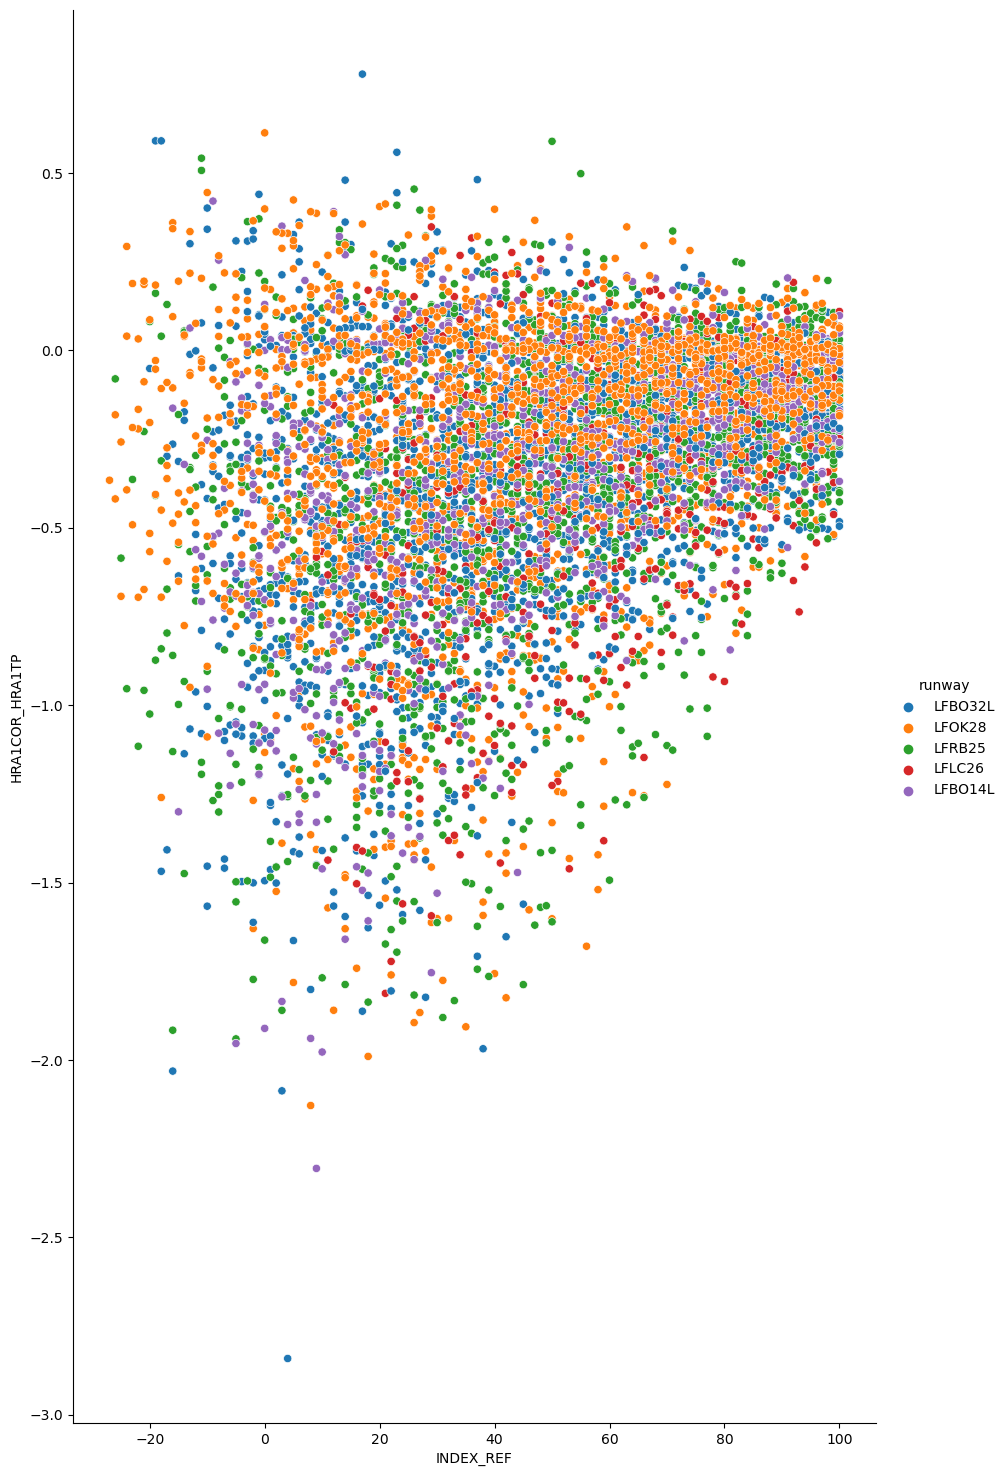

In [173]:
sns.pairplot(x_vars="INDEX_REF", y_vars="HRA1COR_HRA1TP",data=df2,hue="runway",height=15, aspect=0.6)

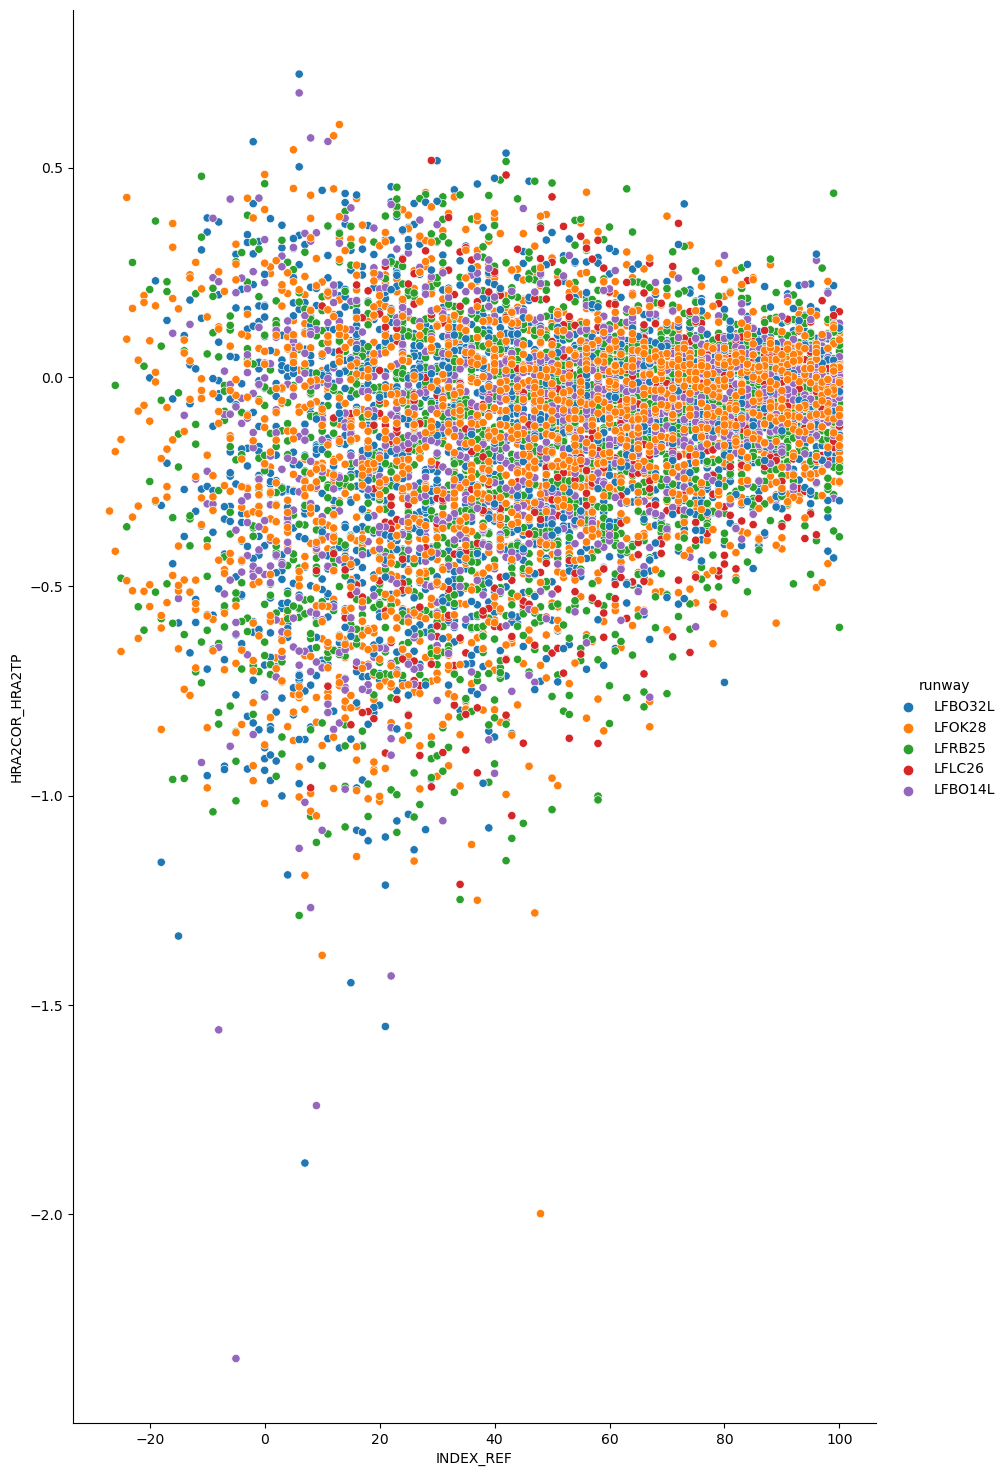

In [174]:
sns.pairplot(x_vars="INDEX_REF", y_vars="HRA2COR_HRA2TP",data=df2,hue="runway",height=15, aspect=0.6)

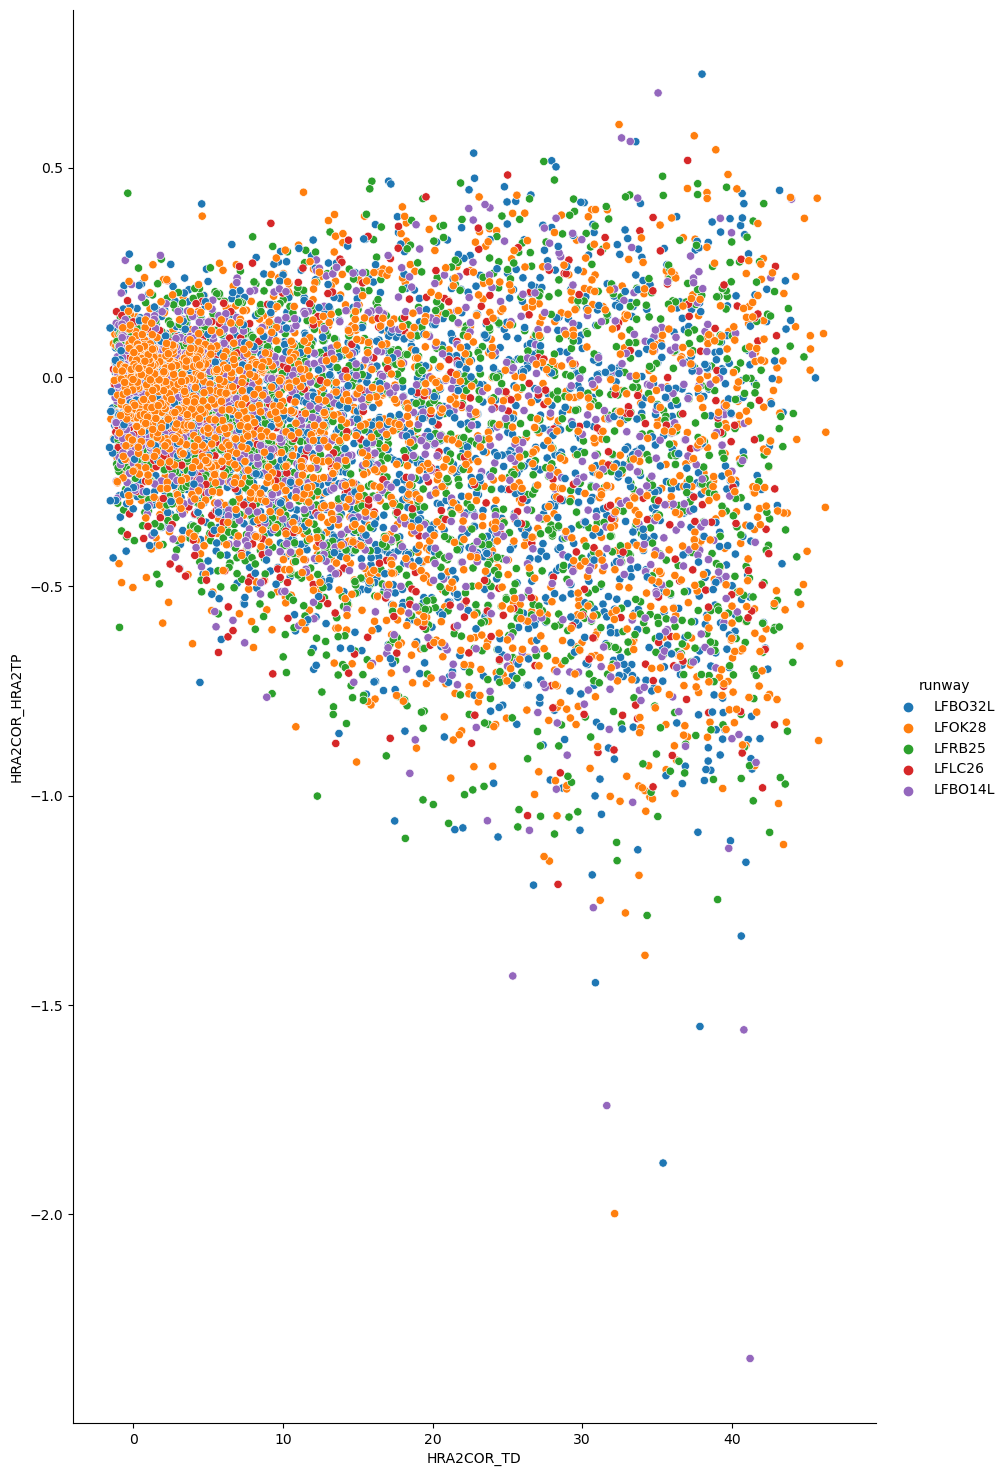

In [175]:
sns.pairplot(x_vars="HRA2COR_TD", y_vars="HRA2COR_HRA2TP",data=df2,hue="runway",height=15, aspect=0.6)

<Axes: xlabel='INDEX_REF', ylabel='HRA2COR_HRA2TP'>

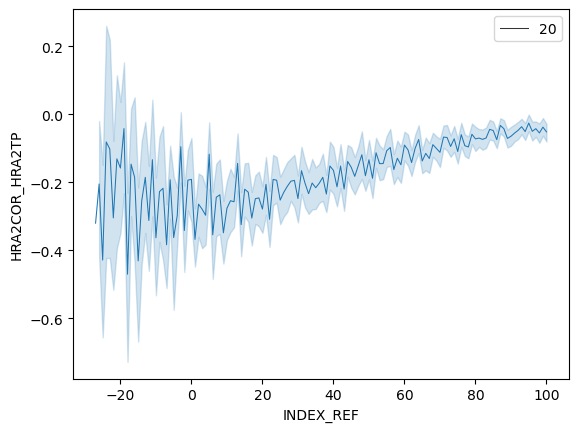

In [176]:
sns.lineplot(x="INDEX_REF", y="HRA2COR_HRA2TP",data=df2,size=20)

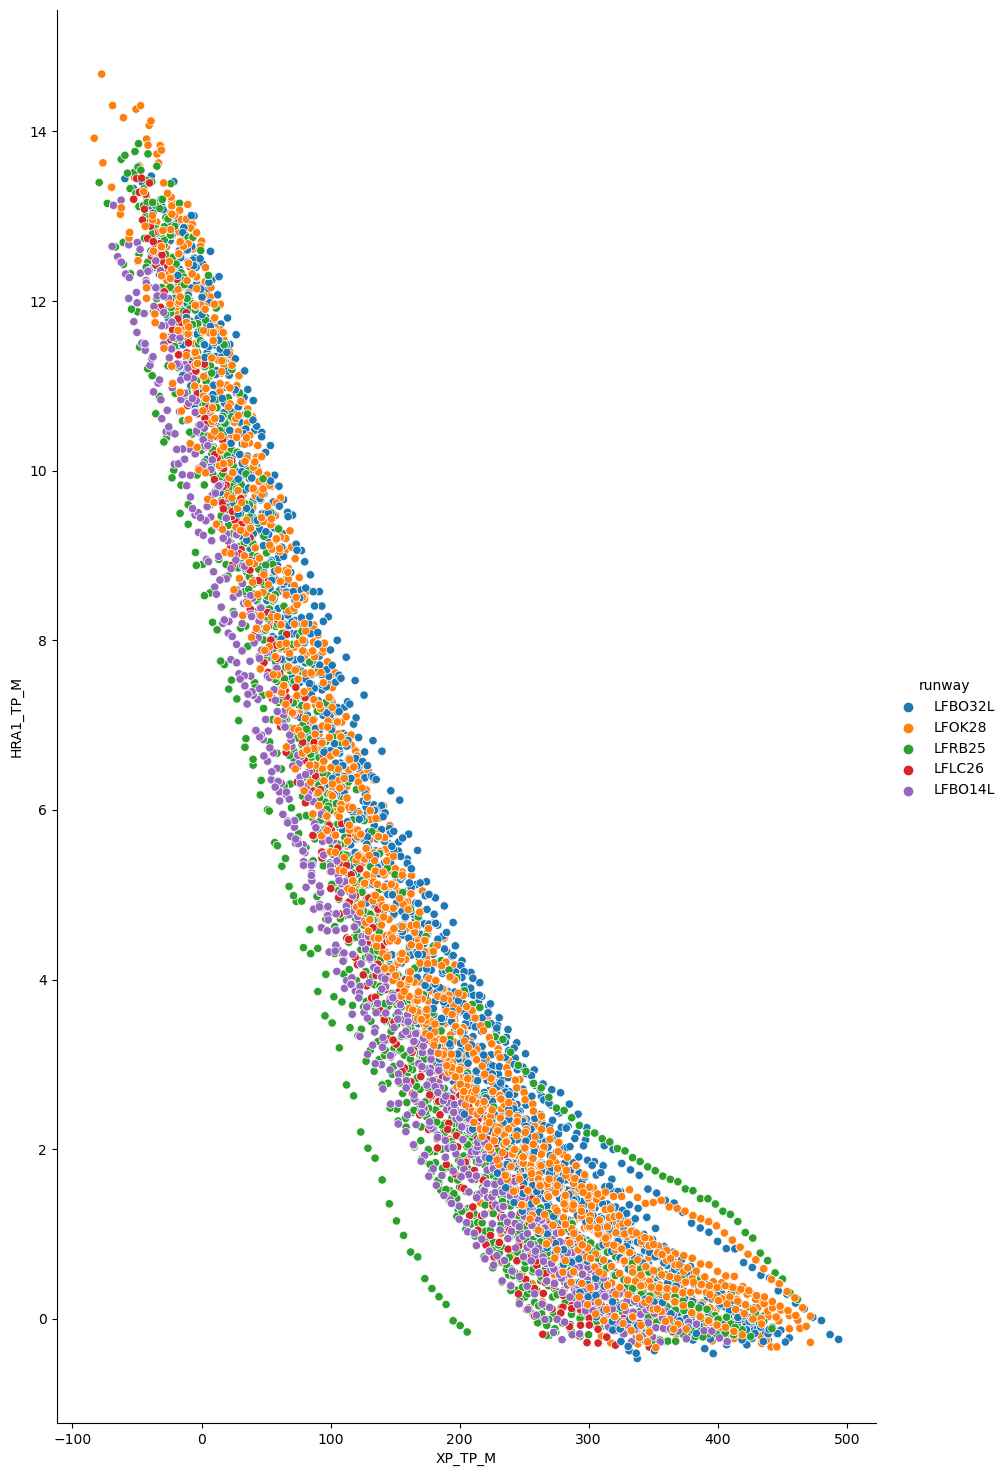

In [177]:
sns.pairplot(x_vars="XP_TP_M", y_vars="HRA1_TP_M",data=df2,hue="runway",height=15, aspect=0.6)

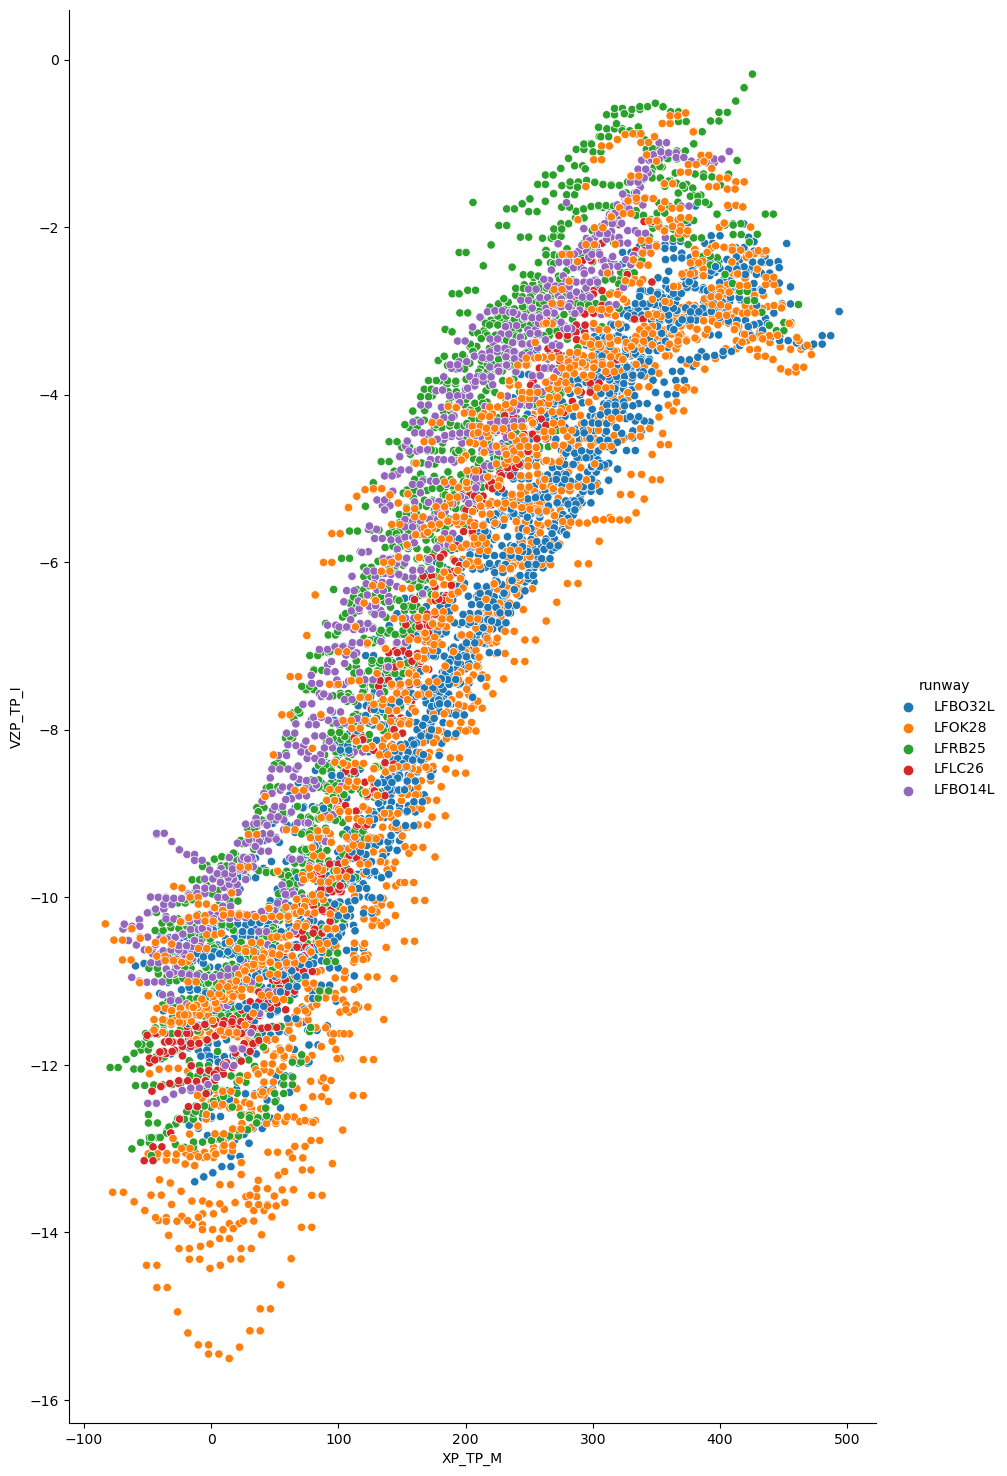

In [178]:
sns.pairplot(x_vars="XP_TP_M", y_vars="VZP_TP_I",data=df2,hue="runway",height=15, aspect=0.6)

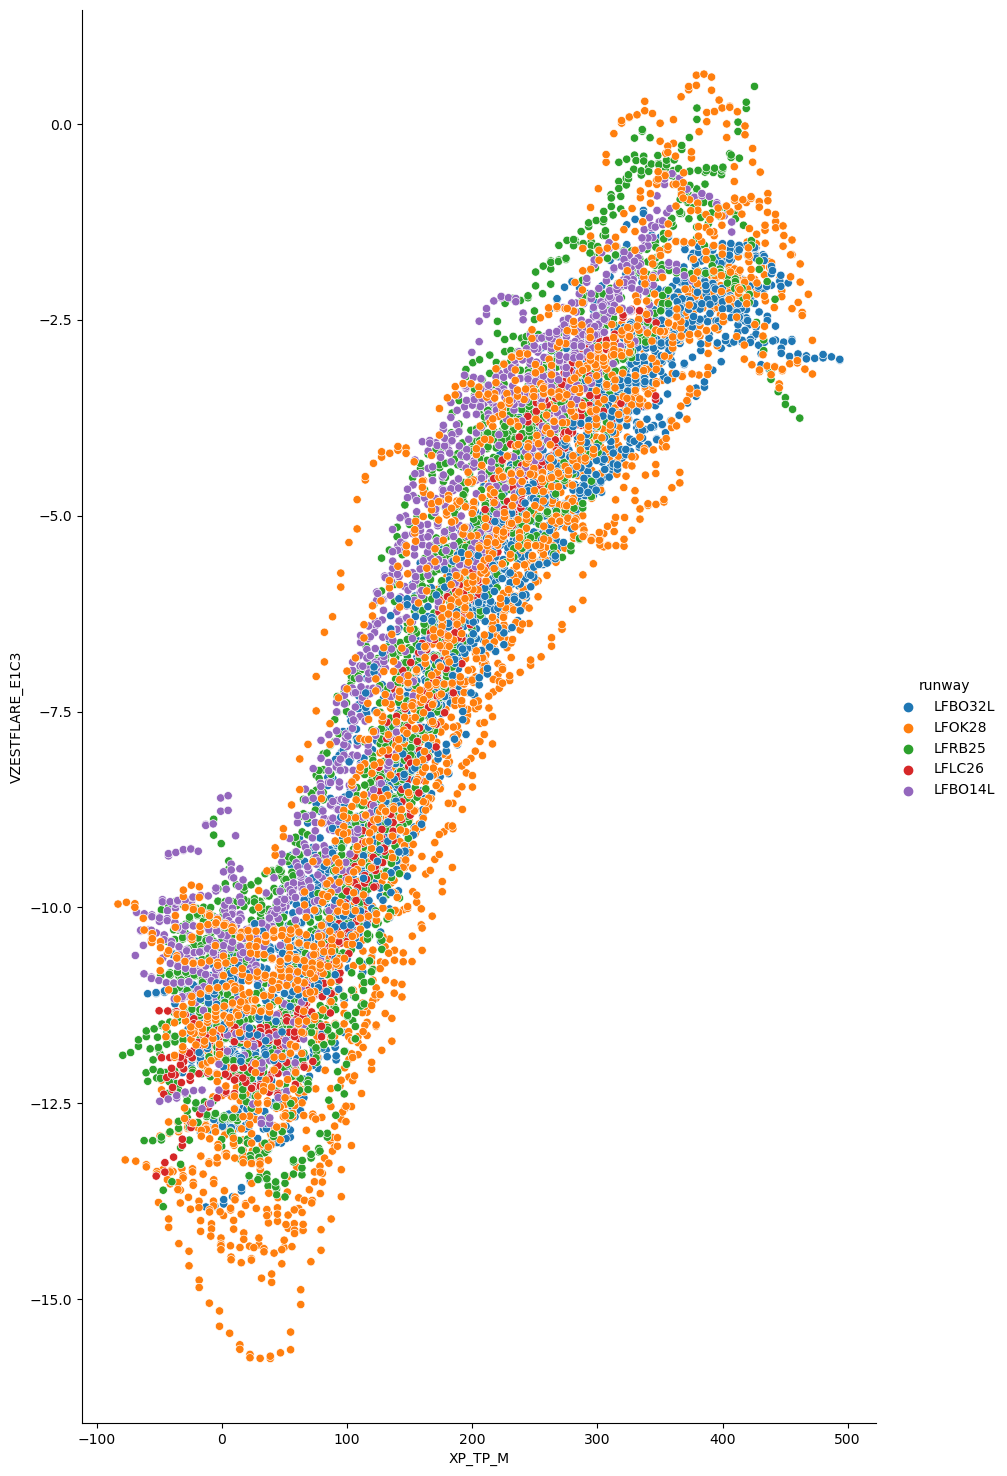

In [179]:
sns.pairplot(x_vars="XP_TP_M", y_vars="VZESTFLARE_E1C3",data=df2,hue="runway",height=15, aspect=0.6)

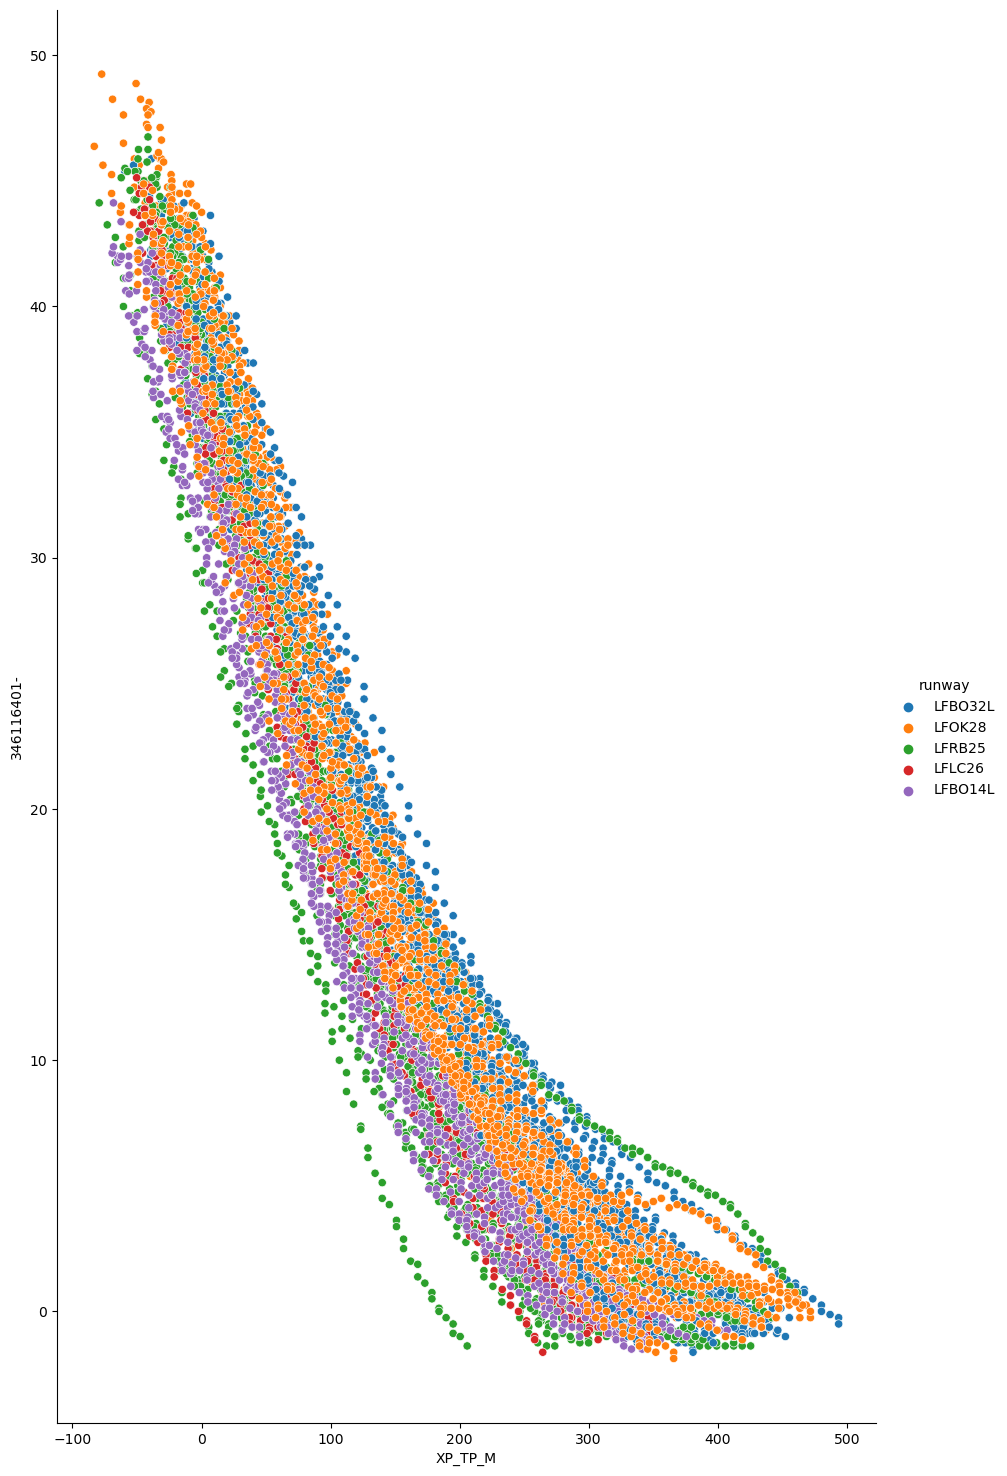

In [180]:
sns.pairplot(x_vars="XP_TP_M", y_vars="346116401-",data=df2,hue="runway",height=15, aspect=0.6)

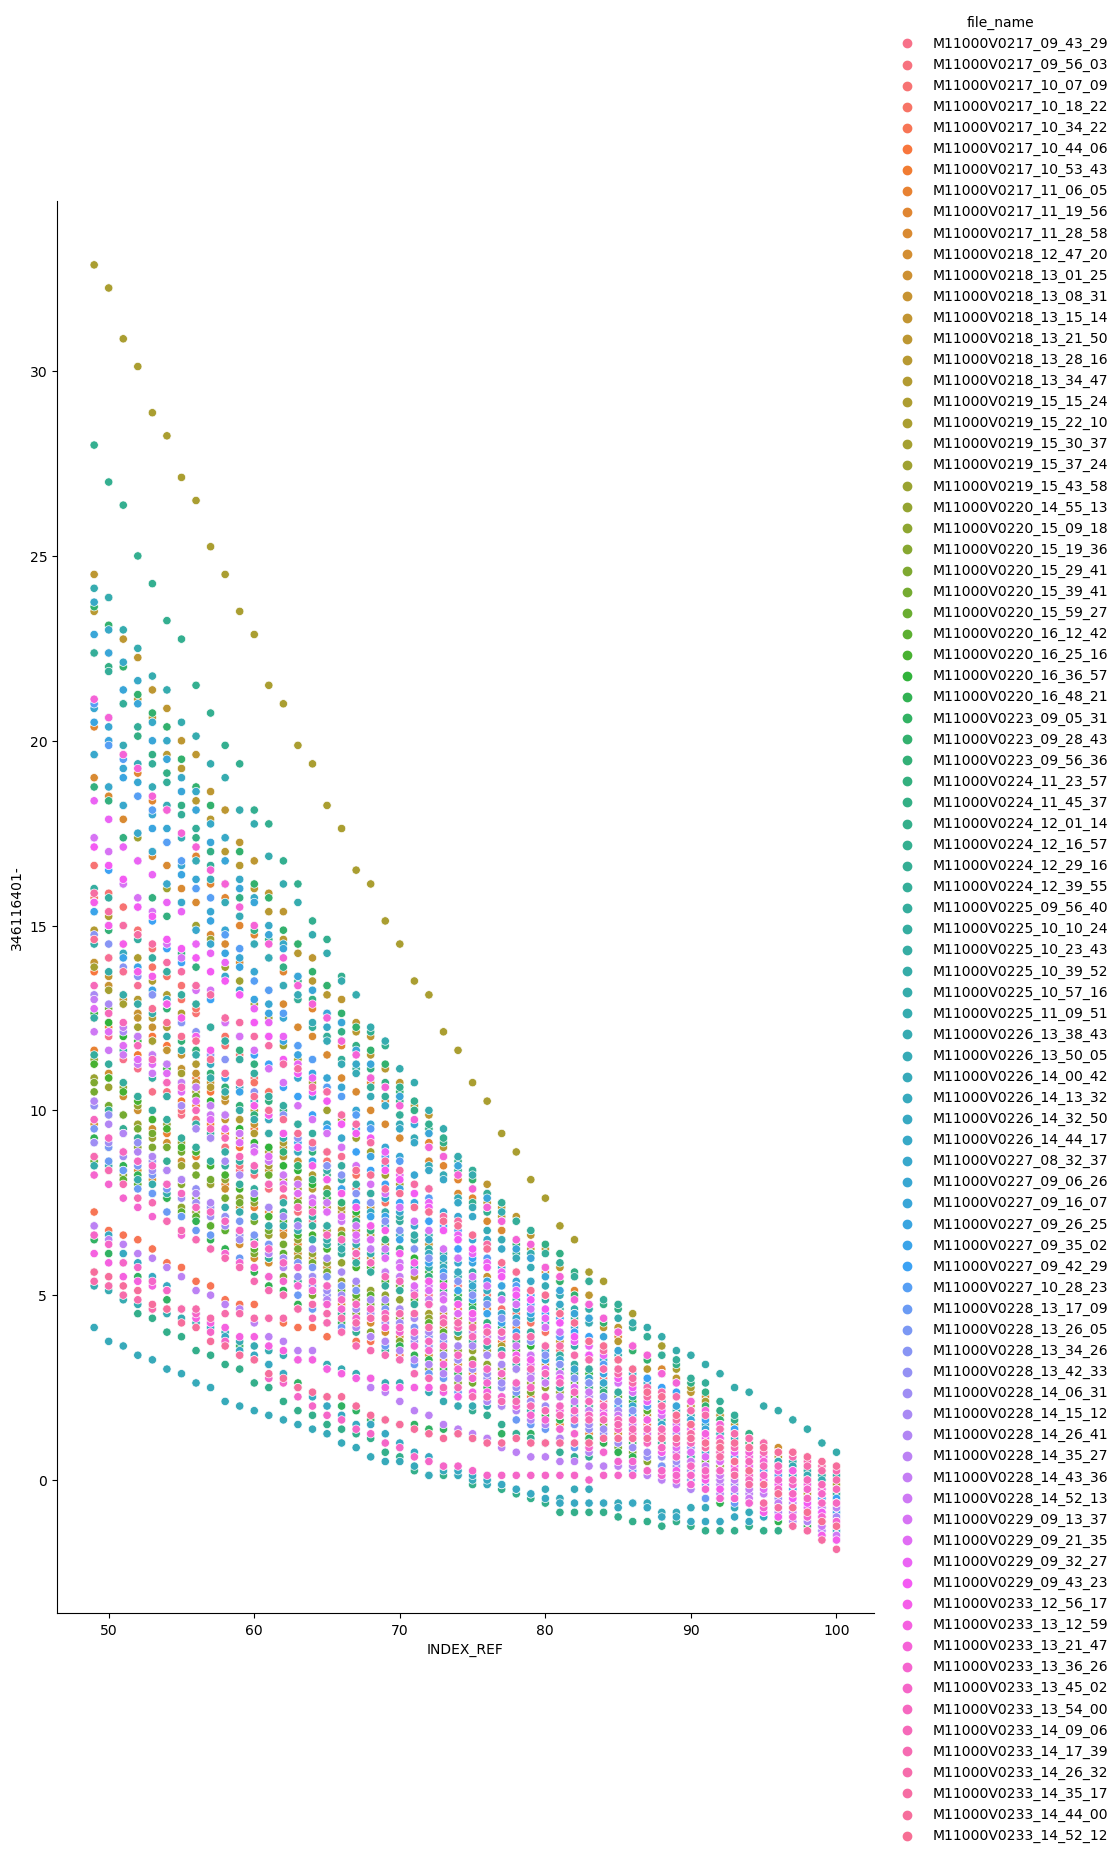

In [181]:
sns.pairplot(x_vars="INDEX_REF", y_vars="346116401-",data=df2[df2.INDEX_REF>48],hue="file_name",height=15, aspect=0.6)

<Axes: xlabel='INDEX_REF', ylabel='HRA2COR_HRA2TP'>

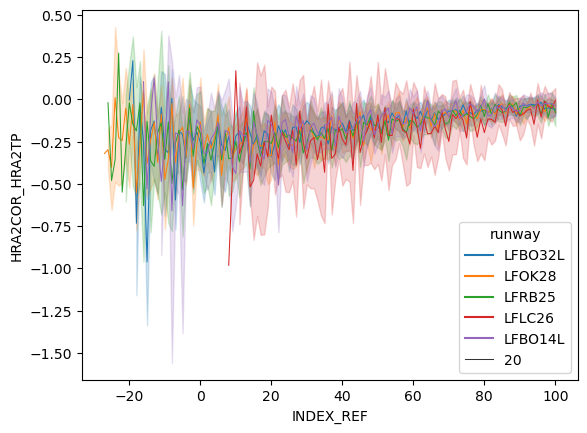

In [182]:
sns.lineplot(x="INDEX_REF", y="HRA2COR_HRA2TP",hue='runway',data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA1COR_HRA1TP'>

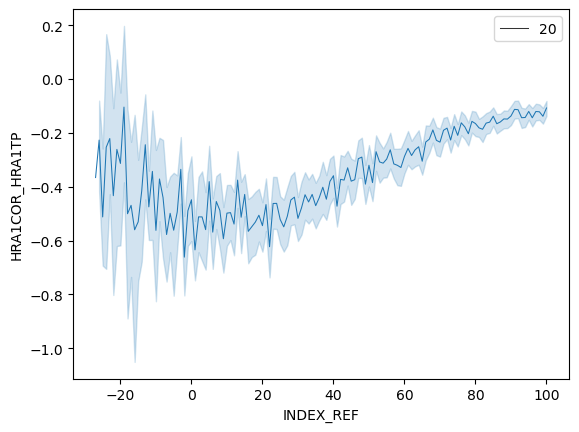

In [183]:
sns.lineplot(x="INDEX_REF", y="HRA1COR_HRA1TP",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA2COR_HRA2TP'>

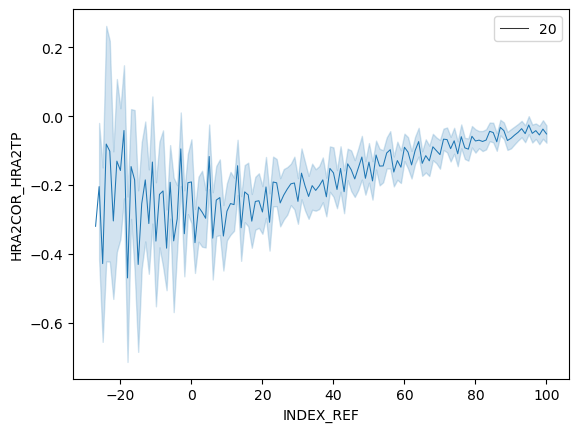

In [184]:
sns.lineplot(x="INDEX_REF", y="HRA2COR_HRA2TP",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA1COR_HMLG'>

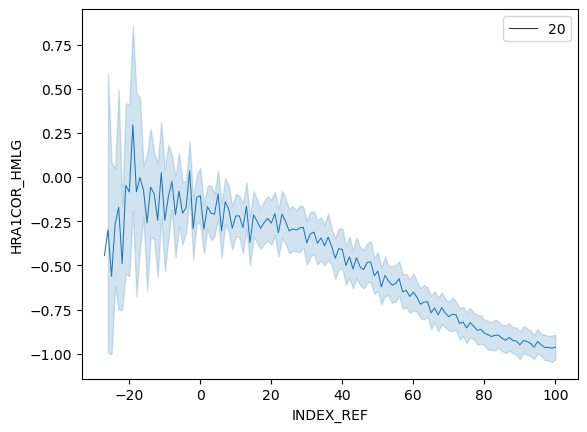

In [185]:
sns.lineplot(x="INDEX_REF", y="HRA1COR_HMLG",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA1_TP_M_HMLG'>

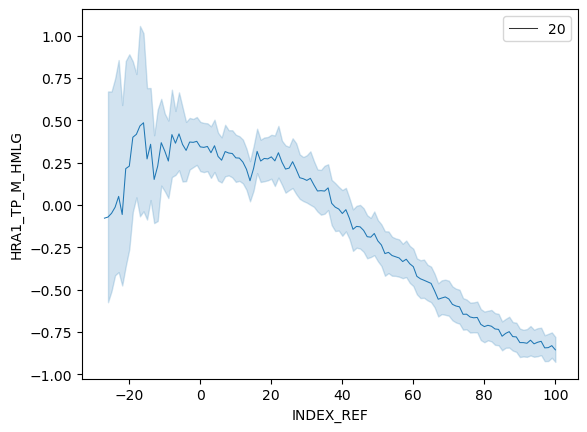

In [186]:
sns.lineplot(x="INDEX_REF", y="HRA1_TP_M_HMLG",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA2COR_HMLG'>

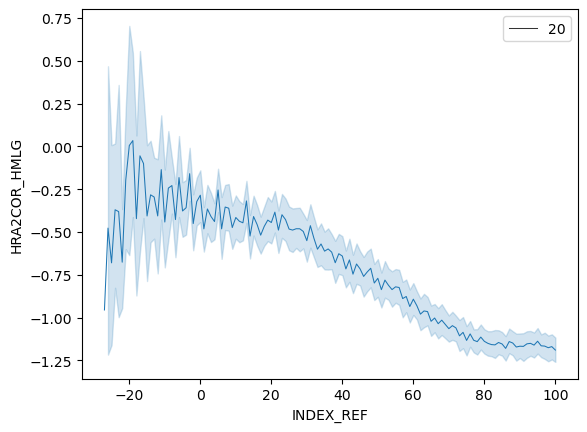

In [187]:
sns.lineplot(x="INDEX_REF", y="HRA2COR_HMLG",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HRA2_TP_M_HMLG'>

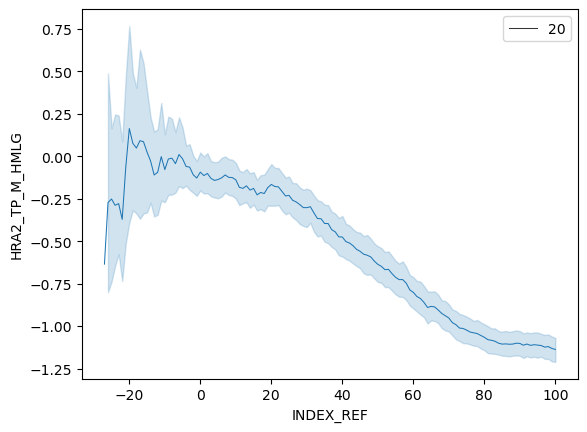

In [188]:
sns.lineplot(x="INDEX_REF", y="HRA2_TP_M_HMLG",data=df2,size=20)

In [189]:
#sns.lineplot(x="INDEX_REF", y="HMLGEST_HMLG",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='HMLGESTL_HMLG'>

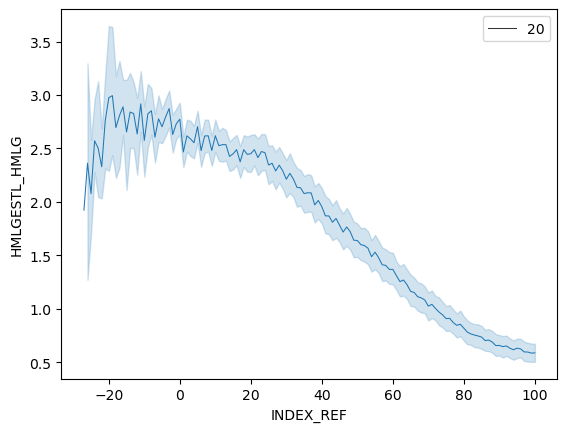

In [190]:
sns.lineplot(x="INDEX_REF", y="HMLGESTL_HMLG",data=df2,size=20)

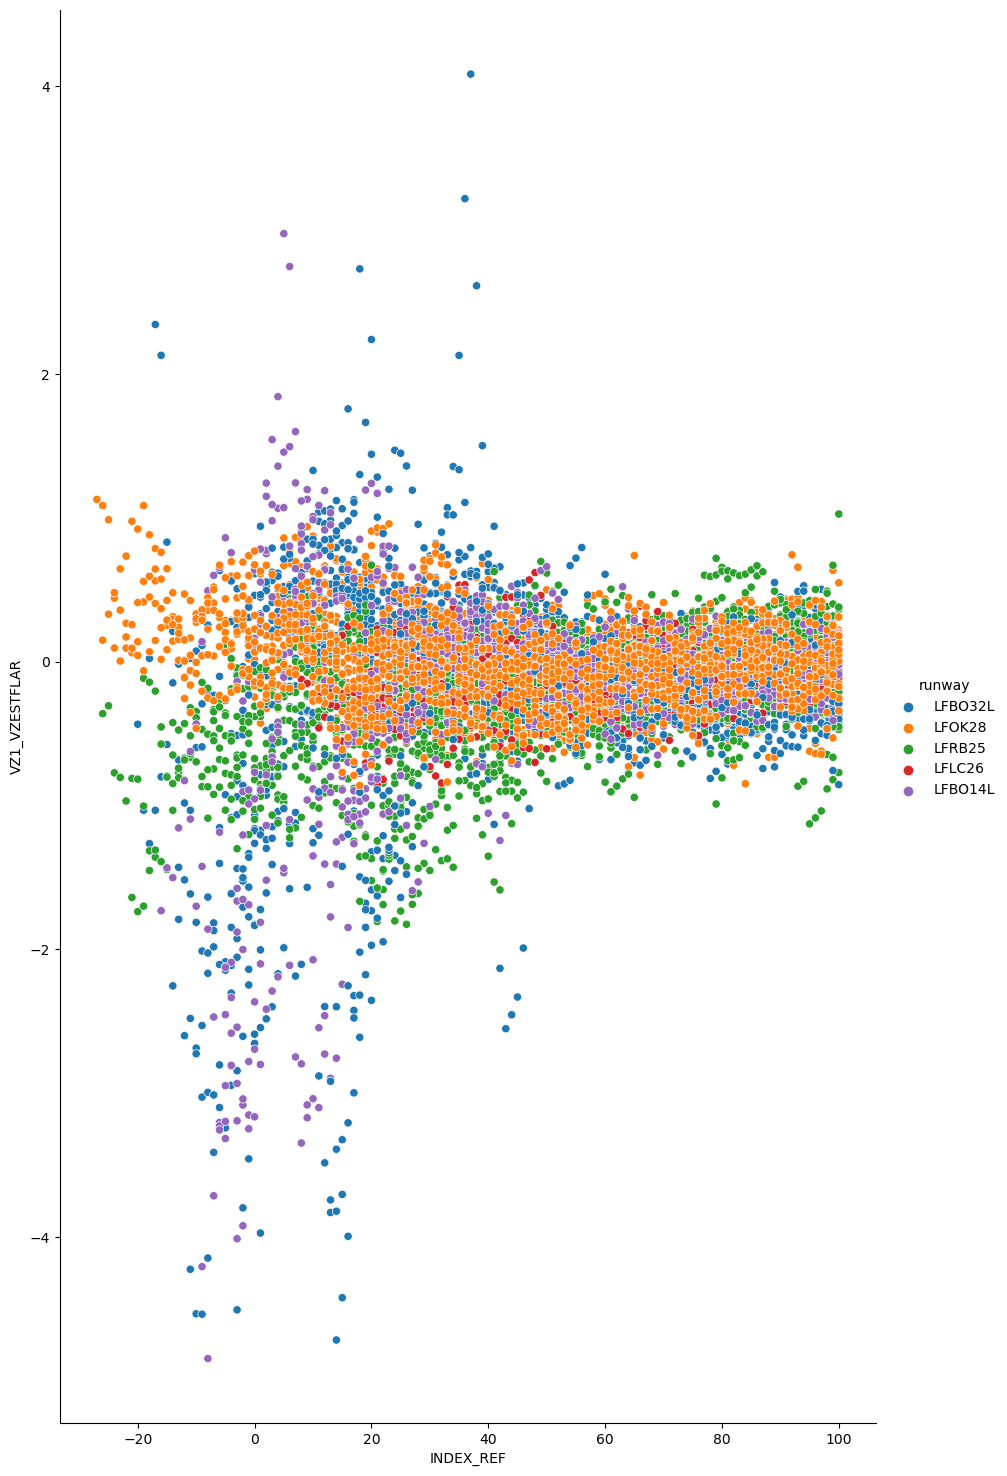

In [191]:
sns.pairplot(x_vars="INDEX_REF", y_vars="VZ1_VZESTFLAR",data=df2,hue="runway",height=15, aspect=0.6)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZESTFLAR'>

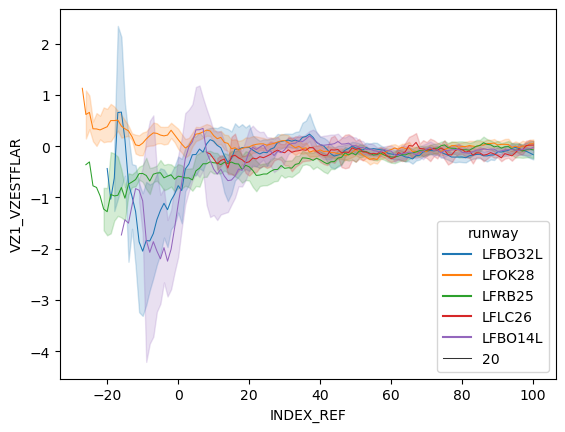

In [192]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZESTFLAR",hue='runway',data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZESTFLAR'>

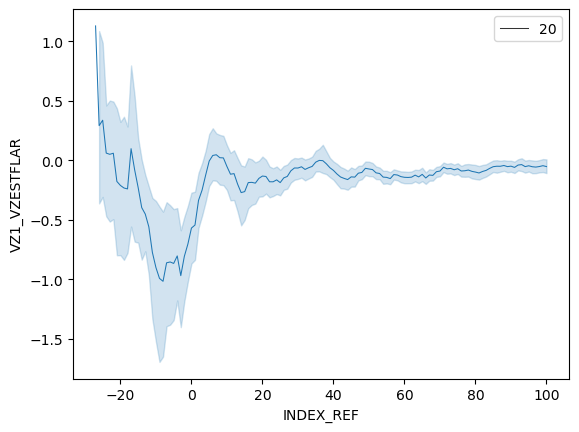

In [193]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZESTFLAR",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZESTFLAR'>

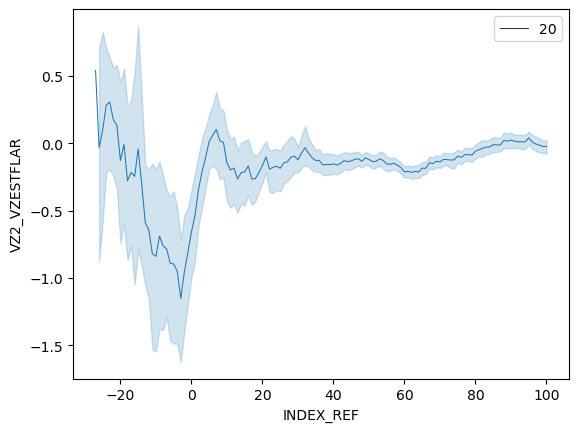

In [194]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZESTFLAR",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJCOR'>

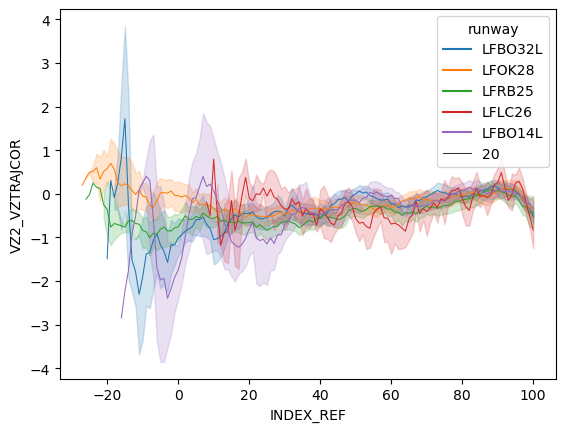

In [195]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJCOR",hue='runway',data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZTRAJCOR'>

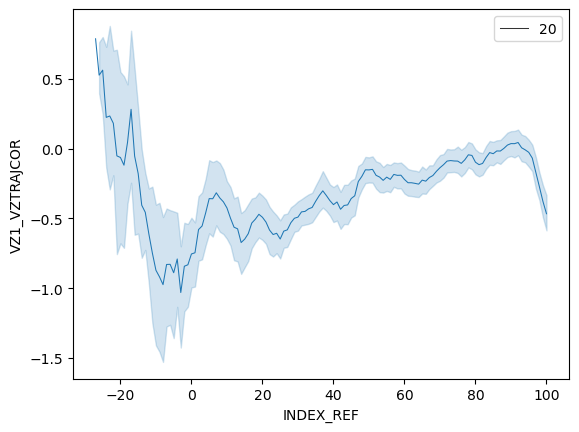

In [196]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZTRAJCOR",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJCOR'>

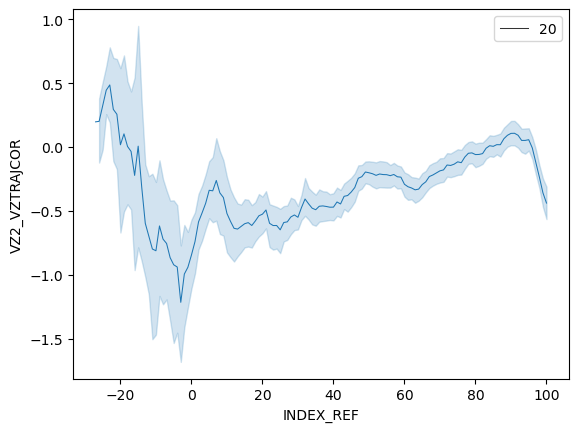

In [197]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJCOR",data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJCOR'>

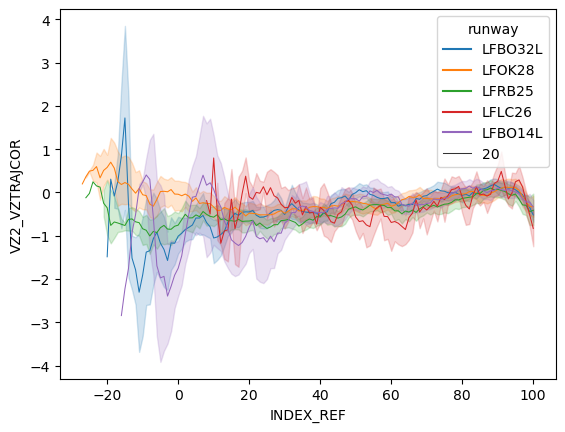

In [198]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJCOR",hue='runway',data=df2,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJ'>

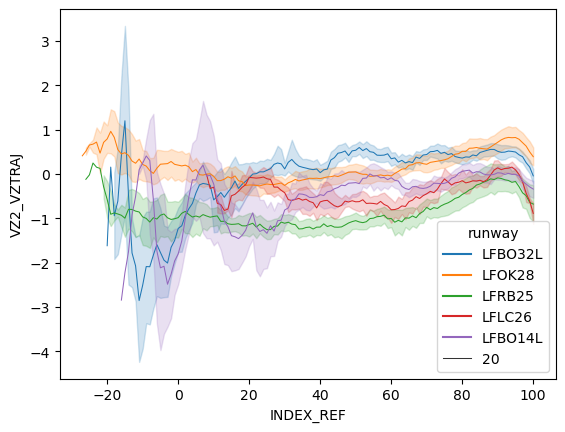

In [199]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJ",hue='runway',data=df2,size=20)

In [200]:
file_name='Compiled_data'    

df1.to_csv(os.path.join(filepath_rwy,  file_name + '_vz' + '.csv'),index=False) 

In [201]:
df2[df2.INDEX_REF>60].describe()

GMT_S      XP_TP_M     VZP_TP_I     VXP_TP_M       VZ1_TD  \
count  3.440000e+03  3440.000000  3440.000000  3440.000000  3440.000000   
mean   6.466659e+06   291.624007    -3.901296    65.985609    -3.836010   
std    6.129393e+05    77.336127     1.763988     5.613228     2.042176   
min    5.651014e+06    67.846182   -13.178513    54.358582   -13.380650   
25%    5.759044e+06   237.914321    -4.869631    62.021121    -4.957986   
50%    6.430629e+06   291.970287    -3.534881    65.754842    -3.525049   
75%    6.876397e+06   346.478783    -2.757902    68.851973    -2.438133   
max    7.570338e+06   493.647091    -0.171482    83.657489     1.228942   

            VZ2_TD  VZESTFLARE_E1C3       IMPACT    IMPACT_TD   346116401-  \
count  3440.000000      3440.000000  3440.000000  3440.000000  3440.000000   
mean     -3.828705        -3.756158     0.013663     0.025000     3.468677   
std       2.076614         1.979375     0.116104     0.156148     3.551926   
min     -13.586957       -13.691031     0.000000     0.000000    -1.875000   
25%      -4.956408        -4.844414     0.000000     0.000000     0.750000   
50%      -3.490010        -3.416106     0.000000     0.000000     2.625000   
75%      -2.414976        -2.409308     0.000000     0.000000     5.500000   
max       0.991000         0.636213     1.000000     1.000000    21.500000   

       ...  HRA1COR_HMLG  HRA2COR_HMLG  HRA1_TP_M_HMLG  HRA2_TP_M_HMLG  \
count  ...   3440.000000   3440.000000     3440.000000     3440.000000   
mean   ...     -0.859425     -1.106637       -0.680068       -1.033349   
std    ...      0.389049      0.377012        0.452964        0.383310   
min    ...     -1.842163     -2.172957       -1.839896       -2.132025   
25%    ...     -1.138901     -1.369647       -0.979480       -1.291896   
50%    ...     -0.879841     -1.124641       -0.727110       -1.059280   
75%    ...     -0.604046     -0.866775       -0.394546       -0.788888   
max    ...      1.041595      0.808212        1.460593        0.358614   

         INDEX_REF  HRA1COR_HRA1TP  HRA2COR_HRA2TP  HMLGEST_HMLG  \
count  3440.000000     3440.000000     3440.000000   3440.000000   
mean     80.500000       -0.179357       -0.073287     -0.357227   
std      11.545075        0.211893        0.157665      3.134442   
min      61.000000       -1.280848       -0.835291     -5.694463   
25%      70.750000       -0.285979       -0.148628     -2.739382   
50%      80.500000       -0.131916       -0.046133     -1.155088   
75%      90.250000       -0.013356        0.026396      2.230226   
max     100.000000        0.348208        0.449598      7.535213   

       HMLGEST_HMLGL  HMLGESTL_HMLG  
count    3440.000000    3440.000000  
mean        0.856102       0.856102  
std         0.584500       0.584500  
min        -0.465533      -0.465533  
25%         0.454664       0.454664  
50%         0.783089       0.783089  
75%         1.193788       1.193788  
max         3.478658       3.478658  

[8 rows x 43 columns]

In [202]:
print(len(df1["file_name"].unique()))

86


In [203]:
df3=df2[(df2.INDEX_REF<=100)&(df2.INDEX_REF>=60)]

In [204]:
result_VZ1_VZESTFLAR = df3.groupby('INDEX_REF').agg({'VZ1_VZESTFLAR': ['min', 'max','mean','std','count']})

In [205]:
print (result_VZ1_VZESTFLAR)

          VZ1_VZESTFLAR                                    
                    min       max      mean       std count
INDEX_REF                                                  
60.0          -0.838711  0.607029 -0.142619  0.232339    86
61.0          -0.905245  0.503591 -0.143903  0.236036    86
62.0          -0.865546  0.411635 -0.141500  0.223564    86
63.0          -0.815375  0.520268 -0.124441  0.235627    86
64.0          -0.781329  0.446100 -0.139099  0.251768    86
65.0          -0.943471  0.738178 -0.117950  0.256386    86
66.0          -0.788921  0.404292 -0.148272  0.230988    86
67.0          -0.686063  0.378624 -0.123408  0.230597    86
68.0          -0.589168  0.464997 -0.126348  0.211171    86
69.0          -0.714069  0.347751 -0.095581  0.210181    86
70.0          -0.607618  0.410851 -0.090116  0.204215    86
71.0          -0.547161  0.322966 -0.057906  0.192027    86
72.0          -0.619615  0.473147 -0.071424  0.197831    86
73.0          -0.709065  0.334547 -0.067

In [206]:
result_VZ2_VZESTFLAR = df3.groupby('INDEX_REF').agg({'VZ2_VZESTFLAR': ['min', 'max','mean','std','count']})

In [207]:
print (result_VZ2_VZESTFLAR)

          VZ2_VZESTFLAR                                    
                    min       max      mean       std count
INDEX_REF                                                  
60.0          -0.734142  0.230003 -0.212521  0.197249    86
61.0          -0.887214  0.283928 -0.209471  0.219373    86
62.0          -0.750570  0.254397 -0.216616  0.227413    86
63.0          -0.878767  0.305497 -0.209516  0.243442    86
64.0          -0.839575  0.356326 -0.213237  0.234343    86
65.0          -0.727193  0.487100 -0.185241  0.229182    86
66.0          -0.705174  0.437279 -0.186588  0.208307    86
67.0          -0.534474  0.507228 -0.146180  0.217113    86
68.0          -0.701947  0.373455 -0.151243  0.216597    86
69.0          -0.701510  0.500591 -0.134116  0.232993    86
70.0          -0.655746  0.401426 -0.138626  0.200721    86
71.0          -0.760958  0.755964 -0.120803  0.220521    86
72.0          -0.953595  0.342683 -0.121824  0.212784    86
73.0          -1.485361  0.360037 -0.125

In [208]:
result_VZ1_VZTRAJCOR = df3.groupby('INDEX_REF').agg({'VZ1_VZTRAJCOR': ['min', 'max','mean','std','count']})

In [209]:
print (result_VZ1_VZTRAJCOR)

          VZ1_VZTRAJCOR                                    
                    min       max      mean       std count
INDEX_REF                                                  
60.0          -1.702969  0.982046 -0.221406  0.472446    86
61.0          -1.503412  0.996839 -0.244933  0.454006    86
62.0          -1.854980  1.001220 -0.245152  0.424288    86
63.0          -1.700367  0.909538 -0.249593  0.454242    86
64.0          -1.858151  0.993953 -0.254962  0.433471    86
65.0          -1.296046  1.337050 -0.226237  0.465595    86
66.0          -1.095506  1.012199 -0.233757  0.410342    86
67.0          -1.284069  0.753778 -0.207868  0.421162    86
68.0          -1.196601  0.597510 -0.193431  0.356494    86
69.0          -1.343904  0.727873 -0.163172  0.394444    86
70.0          -1.425984  1.016890 -0.137360  0.435184    86
71.0          -1.493814  0.792077 -0.115719  0.412098    86
72.0          -1.277913  0.781165 -0.089934  0.389113    86
73.0          -1.619435  0.767418 -0.086

In [210]:
result_VZ2_VZTRAJCOR = df3.groupby('INDEX_REF').agg({'VZ2_VZTRAJCOR': ['min', 'max','mean','std','count']})

In [211]:
print (result_VZ2_VZTRAJCOR)

          VZ2_VZTRAJCOR                                    
                    min       max      mean       std count
INDEX_REF                                                  
60.0          -1.886216  0.720198 -0.291308  0.436819    86
61.0          -1.568327  0.804318 -0.310501  0.454599    86
62.0          -1.622574  0.840210 -0.320268  0.415311    86
63.0          -1.838275  0.652175 -0.334668  0.464008    86
64.0          -1.639667  0.649974 -0.329100  0.426573    86
65.0          -1.561111  0.933091 -0.293529  0.456575    86
66.0          -1.335647  1.021775 -0.272073  0.425118    86
67.0          -1.231228  1.228373 -0.230640  0.413216    86
68.0          -1.223487  1.049651 -0.218325  0.431862    86
69.0          -1.393213  0.867802 -0.201707  0.428770    86
70.0          -1.502681  0.985659 -0.185869  0.445719    86
71.0          -1.368468  1.260754 -0.178616  0.434521    86
72.0          -0.888223  0.781551 -0.140334  0.414403    86
73.0          -1.492118  0.891323 -0.143

In [212]:
#df4=df3[df3.runway!="LFLC26"]

In [213]:
#result_VZ1_VZTRAJCOR = df4.groupby('INDEX_REF').agg({'VZ1_VZTRAJCOR': ['min', 'max','mean','std','count']})

In [214]:
print (result_VZ1_VZTRAJCOR)

          VZ1_VZTRAJCOR                                    
                    min       max      mean       std count
INDEX_REF                                                  
60.0          -1.702969  0.982046 -0.221406  0.472446    86
61.0          -1.503412  0.996839 -0.244933  0.454006    86
62.0          -1.854980  1.001220 -0.245152  0.424288    86
63.0          -1.700367  0.909538 -0.249593  0.454242    86
64.0          -1.858151  0.993953 -0.254962  0.433471    86
65.0          -1.296046  1.337050 -0.226237  0.465595    86
66.0          -1.095506  1.012199 -0.233757  0.410342    86
67.0          -1.284069  0.753778 -0.207868  0.421162    86
68.0          -1.196601  0.597510 -0.193431  0.356494    86
69.0          -1.343904  0.727873 -0.163172  0.394444    86
70.0          -1.425984  1.016890 -0.137360  0.435184    86
71.0          -1.493814  0.792077 -0.115719  0.412098    86
72.0          -1.277913  0.781165 -0.089934  0.389113    86
73.0          -1.619435  0.767418 -0.086

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJ'>

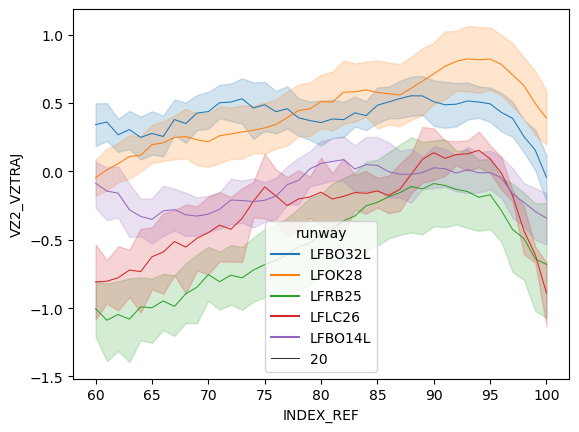

In [215]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJ",hue='runway',data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZTRAJ'>

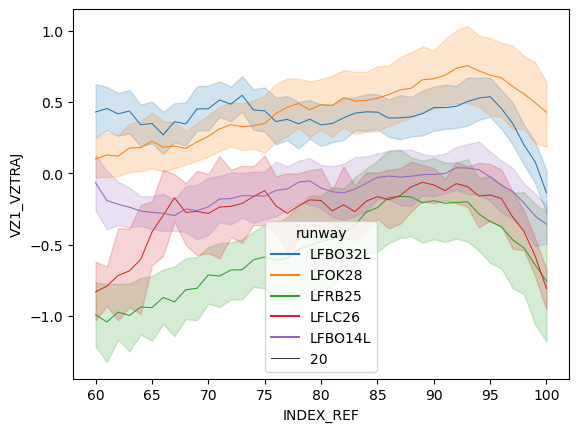

In [216]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZTRAJ",hue='runway',data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZTRAJCOR'>

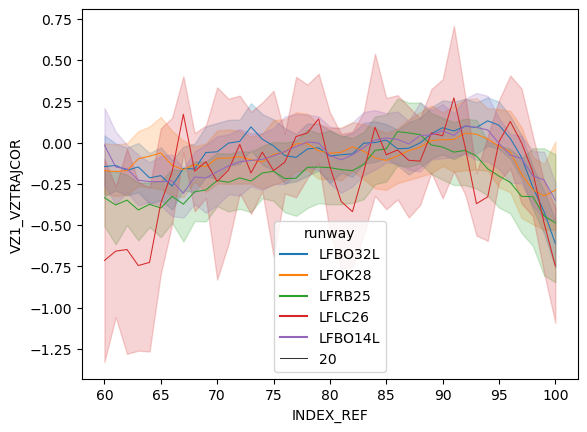

In [217]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZTRAJCOR",hue='runway',data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZTRAJCOR'>

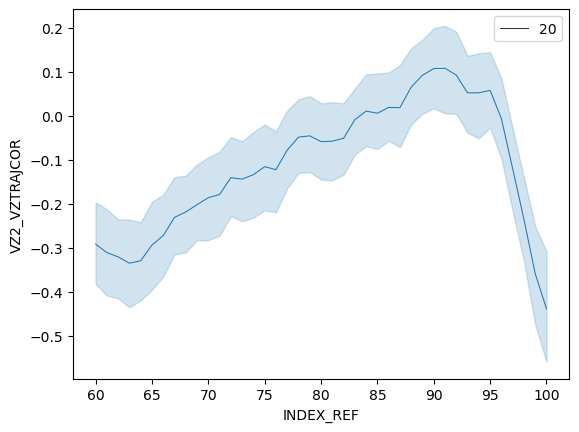

In [218]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZTRAJCOR",data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZTRAJCOR'>

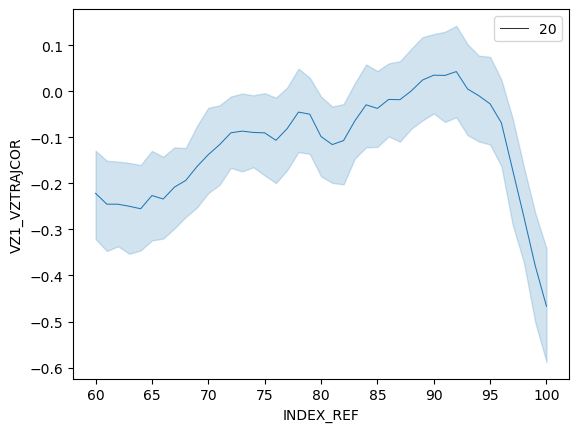

In [219]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZTRAJCOR",data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ1_VZESTFLAR'>

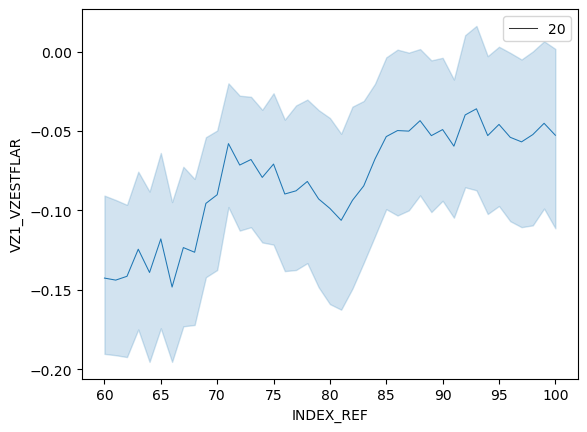

In [220]:
sns.lineplot(x="INDEX_REF", y="VZ1_VZESTFLAR",data=df3,size=20)

<Axes: xlabel='INDEX_REF', ylabel='VZ2_VZESTFLAR'>

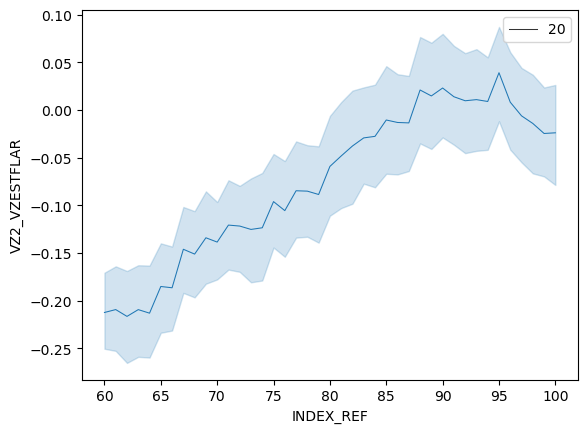

In [221]:
sns.lineplot(x="INDEX_REF", y="VZ2_VZESTFLAR",data=df3,size=20)

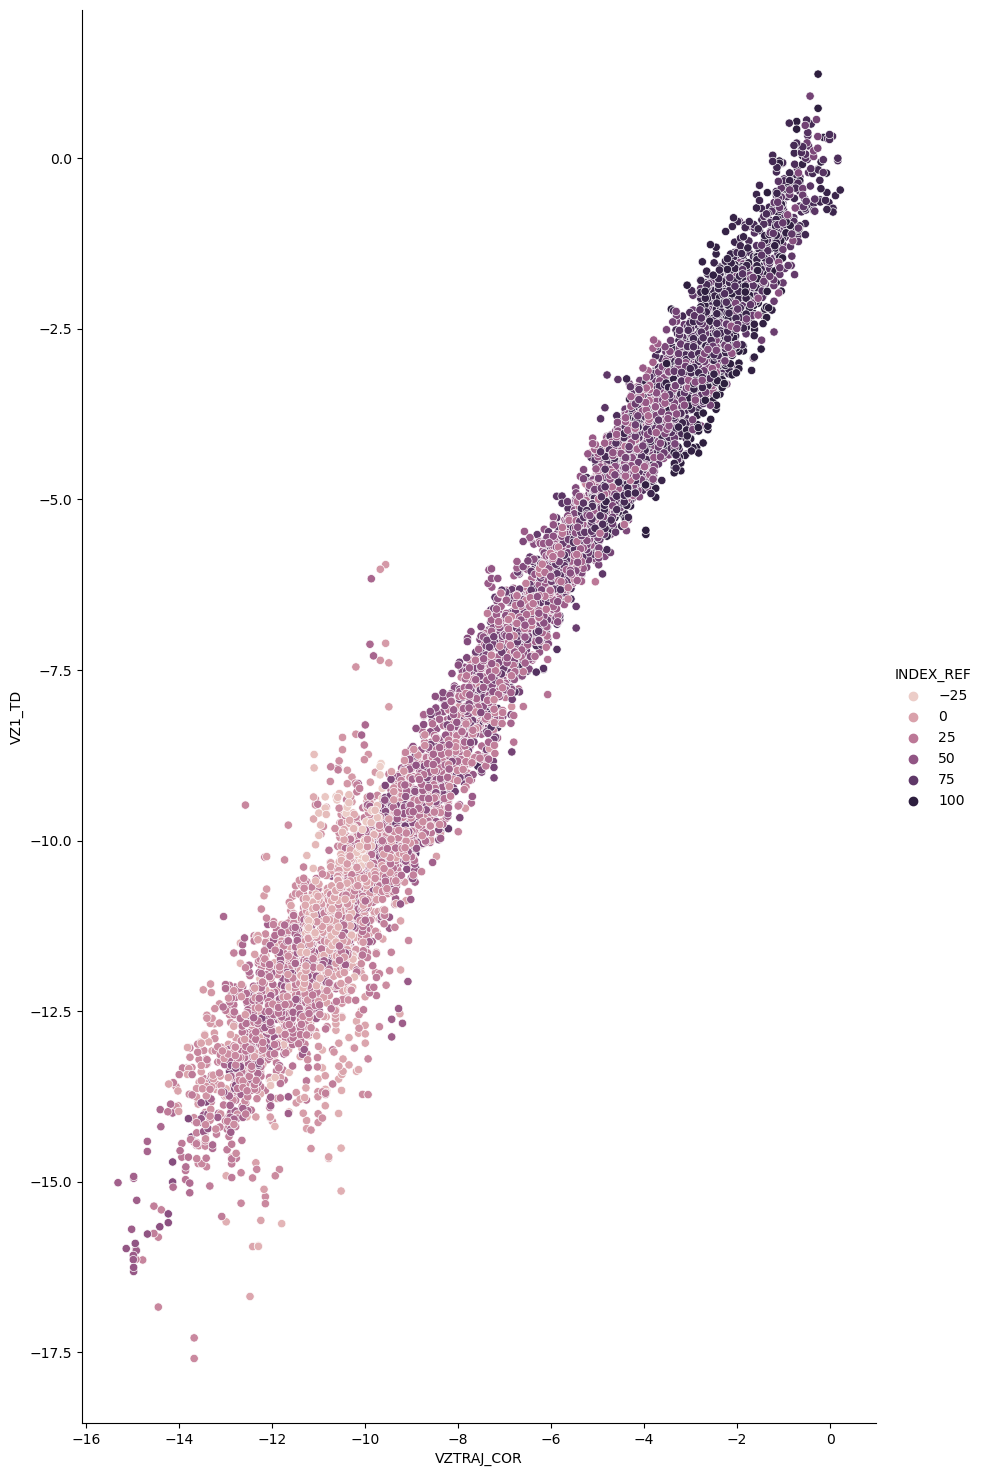

In [222]:

sns.pairplot(x_vars="VZTRAJ_COR", y_vars="VZ1_TD",data=df2,hue="INDEX_REF",height=15, aspect=0.6)

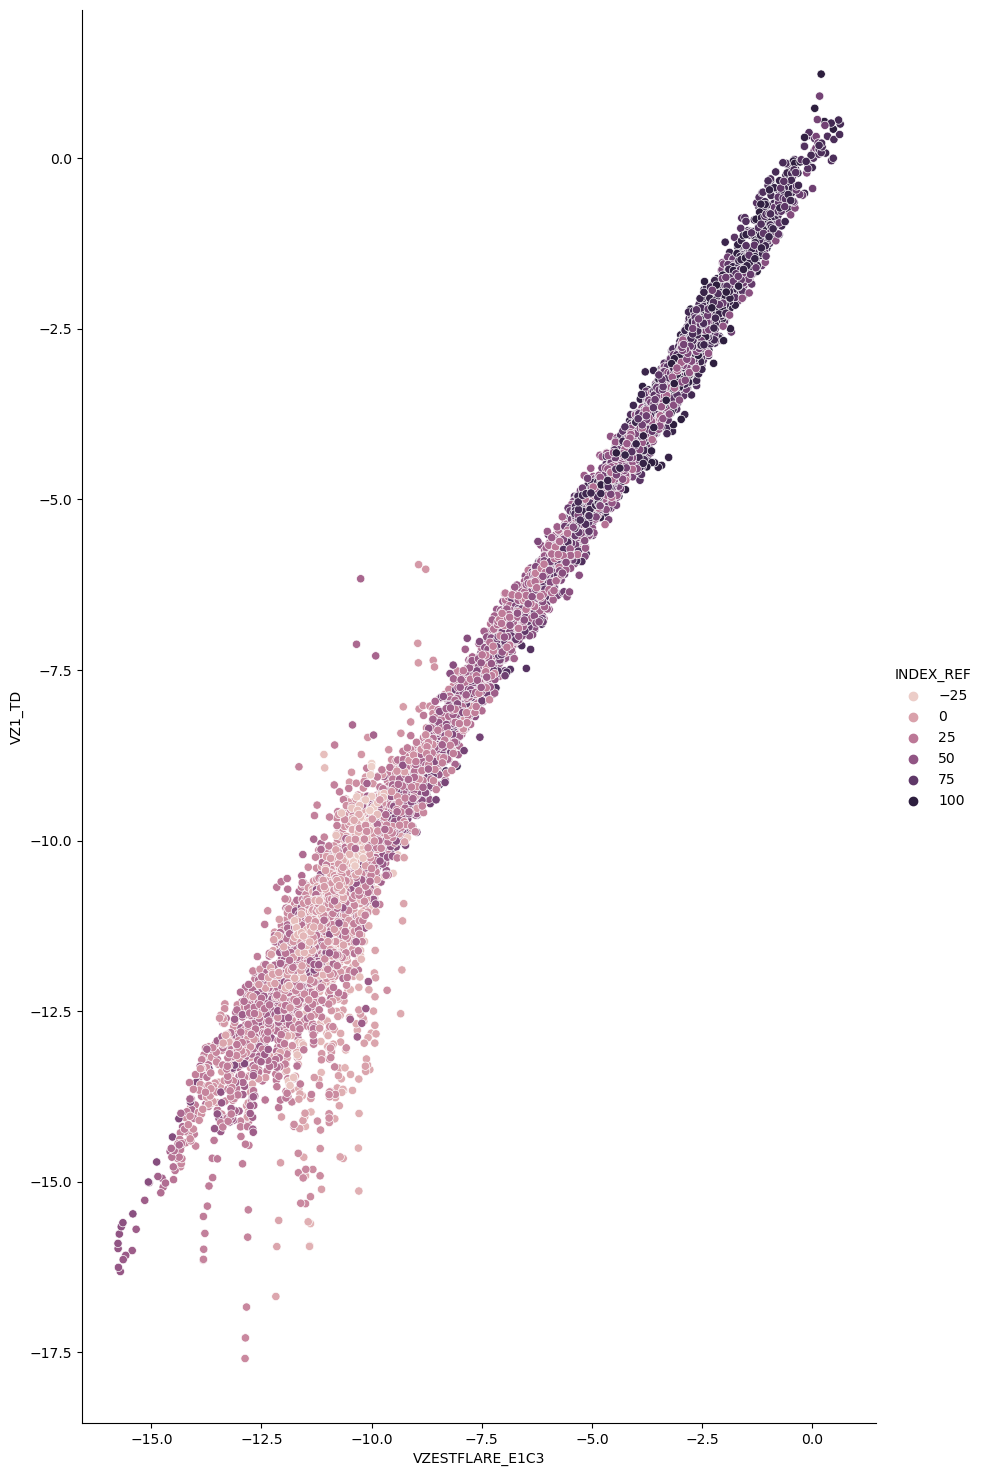

In [223]:

sns.pairplot(x_vars="VZESTFLARE_E1C3", y_vars="VZ1_TD",data=df2,hue="INDEX_REF",height=15, aspect=0.6)